# Dataset 1: Healthcare Dataset Stroke Data

# Import Neccessary Libraries

In [1]:
import pandas as pd
from sharedFunctions import *
from models import *

# Import Dataset

In [2]:
df = pd.read_csv('dataset/healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Pre-processing

## Data Cleaning

In [4]:
display_df_details(df)

,Dtype,Non-Null Count,Null Count,Unique Values,Unique Values List
id,int64,5110,0,5110,[ 9046 51676 31112 ... 19723 37544 44679]
gender,object,5110,0,3,['Male' 'Female' 'Other']
age,float64,5110,0,104,[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 4.80e-01 1.60e-01]
hypertension,int64,5110,0,2,[0 1]
heart_disease,int64,5110,0,2,[1 0]
ever_married,object,5110,0,2,['Yes' 'No']
work_type,object,5110,0,5,['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type,object,5110,0,2,['Urban' 'Rural']
avg_glucose_level,float64,5110,0,3979,[228.69 202.21 105.92 ... 82.99 166.29 85.28]
bmi,float64,4909,201,418,[36.6 32.5 34.4 24. 29. 27.4 22.8 24.2 29.7 36.8 27.3 28.2 30.9 37.5 25.8 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 25.4 22.2 30.5 26.5 33.7 23.1 32. 29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5 33.2 32.8 40.4 25.3 30.2 47.5 20.3 30. 28.9 28.1 31.1 21.7 27. 24.1 45.9 44.1 22.9 29.1 32.3 41.1 25.6 29.8 26.3 26.2 29.4 24.4 28. 28.8 34.6 19.4 30.3 41.5 22.6 56.6 27.1 31.3 31. 31.7 35.8 28.4 20.1 26.7 38.7 34.9 25. 23.8 21.8 27.5 24.6 32.9 26.1 31.9 34.1 36.9 37.3 45.7 34.2 23.6 22.3 37.1 45. 25.5 30.8 37.4 34.5 27.9 29.5 46. 42.5 35.5 26.9 45.5 31.5 33. 23.4 30.7 20.5 21.5 40. 28.6 42.2 29.6 35.4 16.9 26.8 39.3 32.6 35.9 21.2 42.4 40.5 36.7 29.3 19.6 18. 17.6 19.1 50.1 17.7 54.6 35. 22. 39.4 19.7 22.5 25.2 41.8 60.9 23.7 24.5 31.2 16. 31.6 25.1 24.8 18.3 20. 19.5 36. 35.3 40.1 43.1 21.4 34.3 27.6 16.5 24.3 25.7 21.9 38.4 25.9 54.7 18.6 24.9 48.2 20.7 39.5 23.3 64.8 35.1 43.6 21. 47.3 16.6 21.6 15.5 35.6 16.7 41.9 16.4 17.1 29.2 37.9 44.6 39.6 40.3 41.6 39. 23.2 18.9 36.1 36.3 46.5 16.8 46.6 35.2 20.9 13.8 31.8 15.3 38.2 45.2 17. 49.8 27.8 60.2 23. 22.1 26. 44.3 51. 39.7 34.7 21.3 41.2 34.8 19.2 35.7 40.8 24.7 19. 32.4 34. 28.7 32.1 51.5 20.4 30.6 71.9 19.3 40.9 17.2 16.1 16.2 40.6 18.4 21.1 42.3 32.2 50.2 17.5 18.7 42.1 47.8 20.8 30.1 17.3 36.4 12. 36.2 55.7 14.4 43. 41.7 33.8 43.9 22.7 57.5 37. 38.5 16.3 44. 32.7 54.2 40.2 33.3 17.4 41.3 52.3 14.6 17.8 46.1 33.1 18.1 43.8 50.3 38.9 43.7 39.9 15.9 19.8 12.3 78. 38.3 41. 42.6 43.4 15.1 20.6 33.5 43.2 30.4 38. 33.4 44.9 44.7 37.6 39.8 53.4 55.2 42. 37.2 42.8 18.8 42.9 14.3 37.7 48.4 50.6 46.2 49.5 43.3 33.9 18.5 44.5 45.4 55. 54.8 19.9 17.9 15.6 52.8 15.2 66.8 55.1 18.2 48.5 55.9 57.3 10.3 14.1 15.7 56. 44.8 13.4 51.8 38.1 57.7 44.4 38.8 49.3 39.1 54. 56.1 97.6 53.9 13.7 11.5 41.4 14.2 49.4 15.4 45.1 49.2 48.7 53.8 42.7 48.8 52.7 53.5 50.5 15.8 45.3 14.8 51.9 63.3 40.7 61.2 48. 46.8 48.3 58.1 50.4 11.3 12.8 13.5 14.5 15. 59.7 47.4 52.5 13.2 52.9 61.6 49.9 54.3 47.9 13. 13.9 50.9 57.2 64.4 92. 50.8 57.9 45.8 47.6 14. 46.4 46.9 47.1 13.3 48.1 51.7 46.3 54.1 14.9]


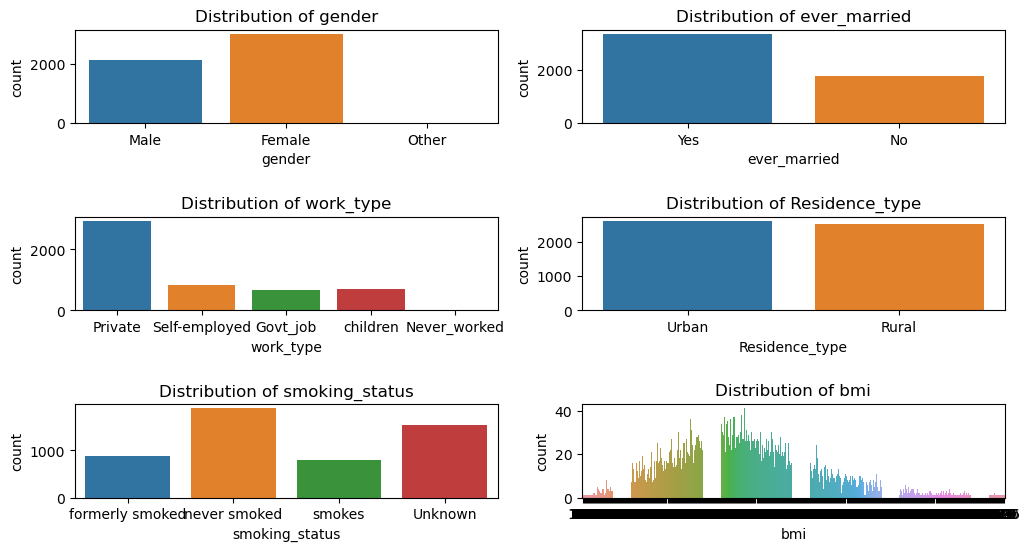

In [5]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'bmi']
plot_categorical_columns(df, categorical_columns)

In [6]:
# Fill missing values in 'bmi' column with mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Replace gender value Female, Male, Other to Female, Male using mode
df.loc[df['gender'] == 'Other', 'gender'] = df['gender'].mode()[0]

# Drop 'id' column
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)

display_df_details(df)

In [7]:
# Fill missing values in 'bmi' column with mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Replace gender value Female, Male, Other to Female, Male using mode
df.loc[df['gender'] == 'Other', 'gender'] = df['gender'].mode()[0]

# Drop 'id' column
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)

display_df_details(df)

# Visualize purpose
if not 'bmi_cat' in df.columns:
    df_origin = df.copy()
    df_origin['bmi_cat'] = pd.cut(df_origin['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
    df_origin['age_cat'] = pd.cut(df_origin['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
    df_origin['glucose_cat'] = pd.cut(df_origin['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])
    df_origin.head()

## Data Transformation

In [8]:
print_unique_values_for_object_columns(df)

gender : ['Male' 'Female']
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


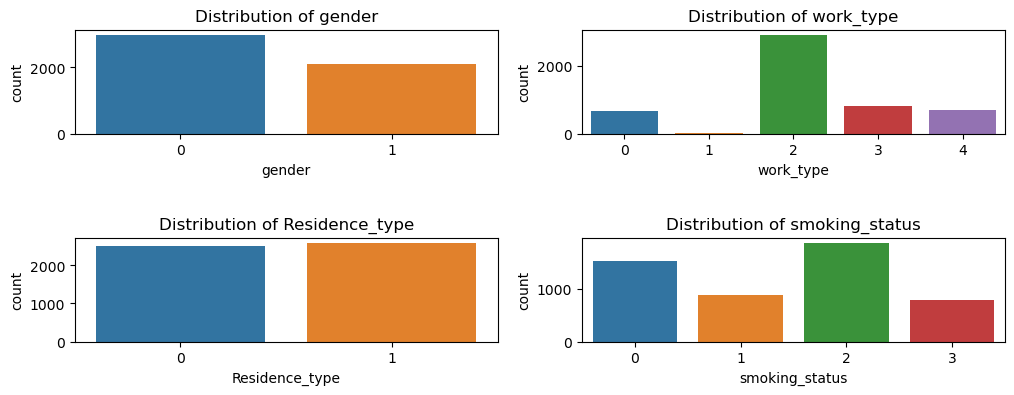

In [9]:
# Call encoding function
df = encode_objectdtypes_columns(df, label_encode_columns=['gender', 'work_type', 'Residence_type', 'smoking_status'])

# Visualize the encode result
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status']
plot_categorical_columns(df, categorical_columns)

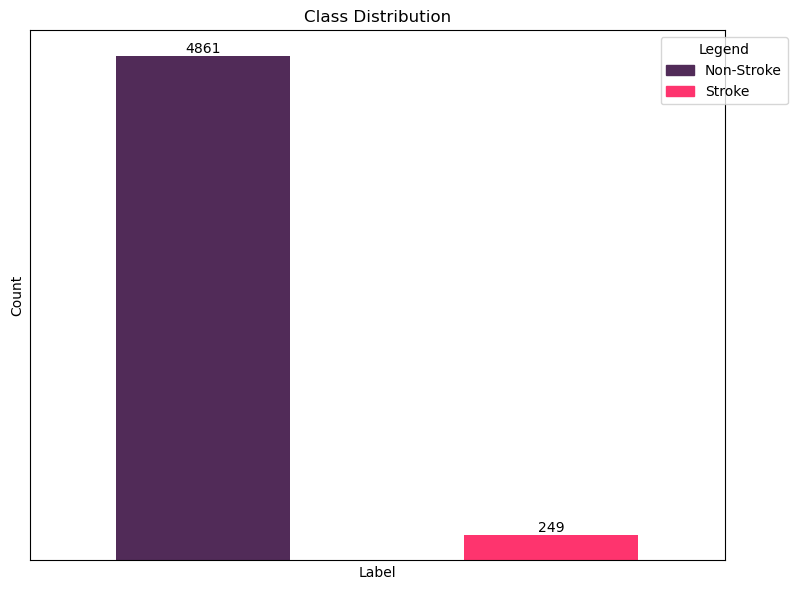

In [10]:
class_distribution(df, 'stroke')

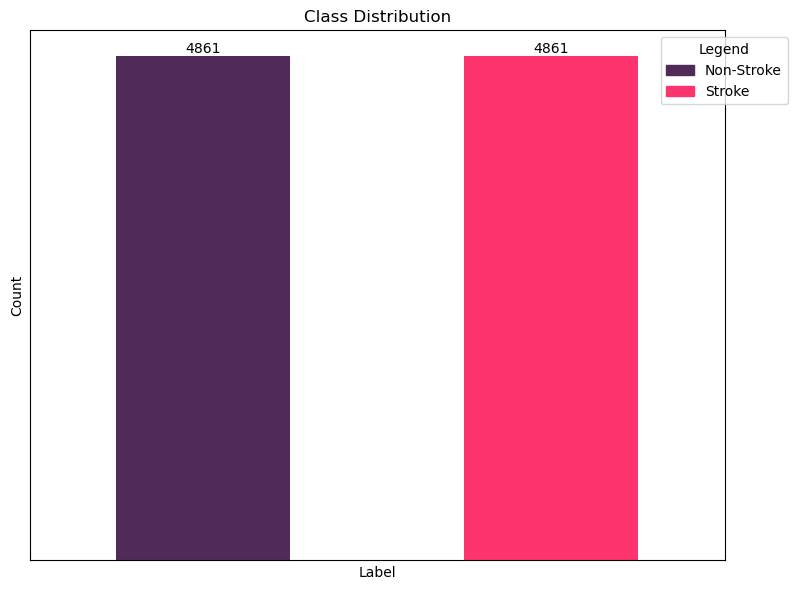

In [11]:
df_res = SMOTE_resample(df, 'stroke')
class_distribution(df_res, 'stroke')

## Data Organisation

In [12]:
X_train, X_test, X_valid, y_train, y_test, y_valid = split_data(df_res, 'stroke')

(5832, 10)
(5832,)
(1945, 10)
(1945,)
(1945, 10)
(1945,)


## Data Exploration

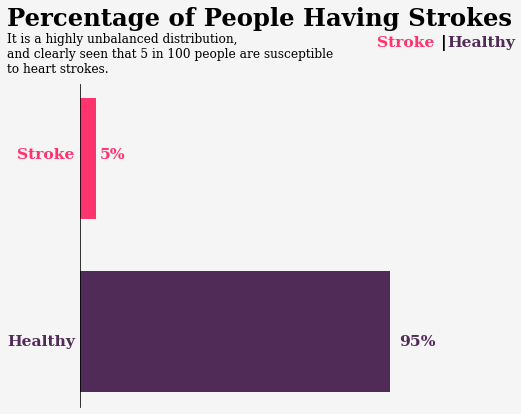

In [13]:
plot_stroke_percentage(df, title = 'Percentage of People Having Strokes', subtitle = 'It is a highly unbalanced distribution,\nand clearly seen that 5 in 100 people are susceptible \nto heart strokes.')

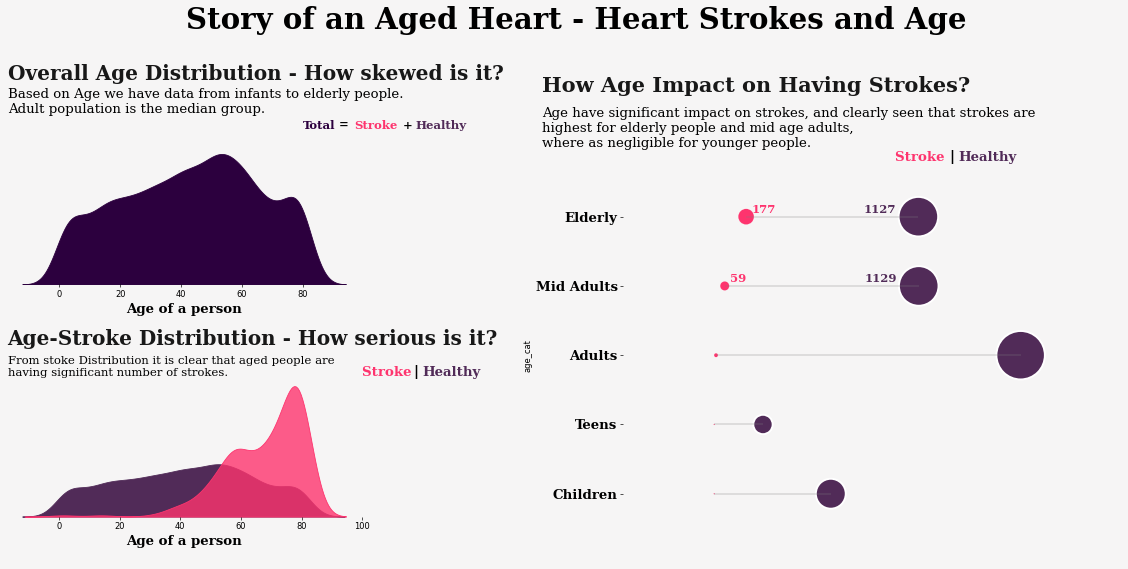

In [14]:
fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[1:4,0:8]) # Distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) # Hue distribution plot
ax1 = fig.add_subplot(gs[1:10,13:]) # Dumbbell plot

# Axes list
axes = [ ax1,ax2, ax3]

# Setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# Dumbbell plot of stoke and healthy people

stroke_age = df_origin[df_origin['stroke'] == 1].age_cat.value_counts()
healthy_age = df_origin[df_origin['stroke'] == 0].age_cat.value_counts()

# Set ticks first
ax1.hlines(y=[0, 1, 2, 3, 4], xmin=[644, 270, 1691, 1129, 1127], 
          xmax=[1, 1, 11, 59, 177], color='grey', **{'linewidth': 0.5})

ax1.set_yticks([0, 1, 2, 3, 4])
ax1.set_yticklabels(labels=['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'],
                    fontdict={'font': 'Serif', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

sns.scatterplot(y = stroke_age.index, x = stroke_age.values, s = stroke_age.values*2, color = '#fe346e', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_age.index, x = healthy_age.values, s = healthy_age.values*2, color = '#512b58', ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 2250)
ax1.set_ylim(ymin = -1,ymax = 5)

ax1.set_yticklabels( labels = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-950,5.8, 'How Age Impact on Having Strokes?' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'},alpha = 0.9)
ax1.text(1000,4.8, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(1300,4.8, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1350,4.8, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#512b58'})
ax1.text(-950,5., 'Age have significant impact on strokes, and clearly seen that strokes are \nhighest for elderly people and mid age adults, \nwhere as negligible for younger people.', 
        {'font':'Serif', 'size':'16','color': 'black'})

ax1.text(stroke_age.values[0] + 30,4.05, stroke_age.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[2] - 300,4.05, healthy_age.values[2], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_age.values[1] + 30,3.05, stroke_age.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[1] - 300,3.05, healthy_age.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

# Distribution plots ---- only single variable

sns.kdeplot(data=df, x='age', ax=ax2, fill=True, color='#2c003e', alpha=1)
ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.025,'Overall Age Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax2.text(-17,0.021, 'Based on Age we have data from infants to elderly people.\nAdult population is the median group.', 
        {'font':'Serif', 'size':'16','color': 'black'})
ax2.text(80,0.019, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(92,0.019, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(97,0.019, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(113,0.019, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(117,0.019, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})

# Distribution plots with hue of strokes

sns.kdeplot(data=df[df['stroke'] == 0], x='age', ax=ax3, fill=True, alpha=1, color='#512b58')
sns.kdeplot(data=df[df['stroke'] == 1], x='age', ax=ax3, fill=True, alpha=0.8, color='#fe346e')

ax3.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0525,'Age-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax3.text(-17,0.043,'From stoke Distribution it is clear that aged people are \nhaving significant number of strokes.', {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(100,0.043, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(117,0.043, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(120,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.25,1,'Story of an Aged Heart - Heart Strokes and Age',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()

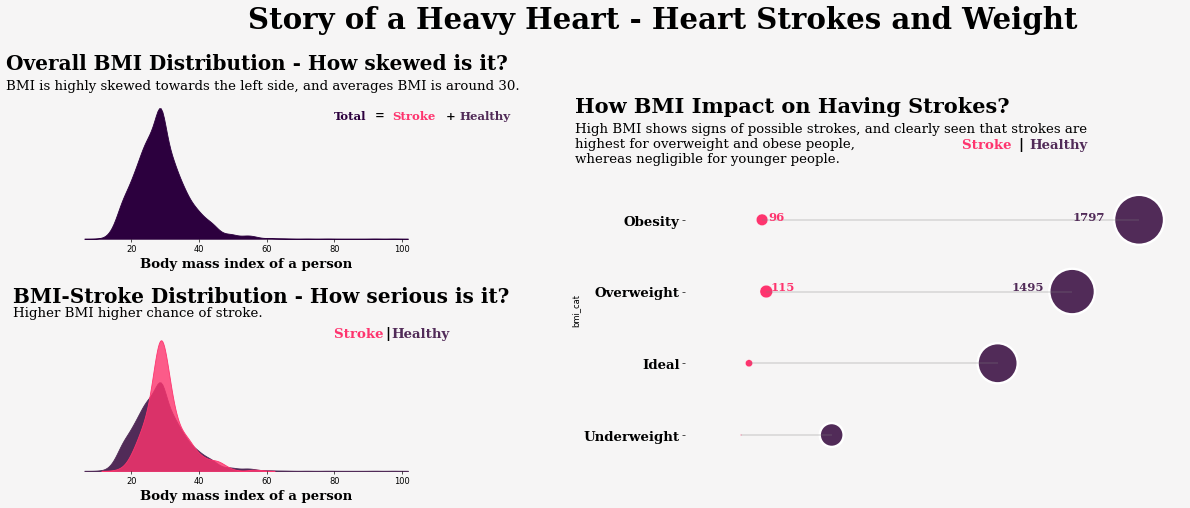

In [15]:
fig = plt.figure(figsize=(24, 10), dpi=60)

gs = fig.add_gridspec(10, 24)
gs.update(wspace=1, hspace=0.05)

ax2 = fig.add_subplot(gs[1:4, 0:8])  # Distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8])  # Hue distribution plot
ax1 = fig.add_subplot(gs[2:9, 13:])  # Dumbbell plot

# Axes list
axes = [ax1, ax2, ax3]

# Setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')

    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_xlim(xmin=-250, xmax=2000)
ax1.set_ylim(ymin=-1, ymax=3.5)

# Dumbbell plot of stoke and healthy people
stroke_bmi = df_origin[df_origin['stroke'] == 1].bmi_cat.value_counts()
healthy_bmi = df_origin[df_origin['stroke'] == 0].bmi_cat.value_counts()

ax1.hlines(y=['Obesity', 'Overweight', 'Ideal', 'Underweight'], xmin=[96, 115, 37, 1],
           xmax=[1797, 1495, 1159, 410], color='grey', **{'linewidth': 0.5})

sns.scatterplot(y=stroke_bmi.index, x=stroke_bmi.values, s=stroke_bmi.values * 2, color='#fe346e', ax=ax1, alpha=1)
sns.scatterplot(y=healthy_bmi.index, x=healthy_bmi.values, s=healthy_bmi.values * 2, color='#512b58', ax=ax1, alpha=1)

ax1.set_yticks(range(4))  # Set the ticks
ax1.set_yticklabels(labels=['Obesity', 'Overweight', 'Ideal', 'Underweight'],
                    fontdict={'font': 'Serif', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

ax1.text(-750, -1.5, 'How BMI Impact on Having Strokes?', {'font': 'Serif', 'size': '25', 'weight': 'bold', 'color': 'black'})
ax1.text(1000, -1., 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'weight': 'bold', 'style': 'normal',
                                'color': '#fe346e'})
ax1.text(1250, -1, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
ax1.text(1300, -1, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'weight': 'bold',
                               'color': '#512b58'})
ax1.text(-750, -0.8, 'High BMI shows signs of possible strokes, and clearly seen that strokes are \nhighest for overweight and obese people, \nwhereas negligible for younger people.',
         {'font': 'Serif', 'size': '16', 'color': 'black'})

ax1.text(stroke_bmi.values[0] + 20, 0.98, stroke_bmi.values[0], {'font': 'Serif', 'size': 14, 'weight': 'bold',
                                                                  'color': '#fe346e'})
ax1.text(healthy_bmi.values[1] - 275, 0.98, healthy_bmi.values[1], {'font': 'Serif', 'size': 14, 'weight': 'bold',
                                                                      'color': '#512b58'})

ax1.text(stroke_bmi.values[1] + 30, 0, stroke_bmi.values[1], {'font': 'Serif', 'size': 14, 'weight': 'bold',
                                                               'color': '#fe346e'})
ax1.text(healthy_bmi.values[0] - 300, 0, healthy_bmi.values[0], {'font': 'Serif', 'size': 14, 'weight': 'bold',
                                                                  'color': '#512b58'})

# Distribution plots ---- only single variable

sns.kdeplot(data=df_origin, x='bmi', ax=ax2, fill=True, color='#2c003e', alpha=1)
ax2.set_xlabel('Body mass index of a person', fontdict={'font': 'Serif', 'color': 'black', 'size': 16, 'weight': 'bold'})
ax2.text(-17, 0.085, 'Overall BMI Distribution - How skewed is it?', {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 24})
ax2.text(-17, 0.075, 'BMI is highly skewed towards the left side, and averages BMI is around 30.',
          {'font': 'Serif', 'size': '16', 'color': 'black'})
ax2.text(80, 0.06, 'Total', {'font': 'Serif', 'size': '14', 'color': '#2c003e', 'weight': 'bold'})
ax2.text(92, 0.06, '=', {'font': 'Serif', 'size': '14', 'color': 'black', 'weight': 'bold'})
ax2.text(97, 0.06, 'Stroke', {'font': 'Serif', 'size': '14', 'color': '#fe346e', 'weight': 'bold'})
ax2.text(113, 0.06, '+', {'font': 'Serif', 'size': '14', 'color': 'black', 'weight': 'bold'})
ax2.text(117, 0.06, 'Healthy', {'font': 'Serif', 'size': '14', 'color': '#512b58', 'weight': 'bold'})

# Distribution plots with hue of strokes
sns.kdeplot(data=df_origin[df_origin['stroke'] == 0], x='bmi', ax=ax3, fill=True, alpha=1, color='#512b58')
sns.kdeplot(data=df_origin[df_origin['stroke'] == 1], x='bmi', ax=ax3, fill=True, alpha=0.8, color='#fe346e')

ax3.set_xlabel('Body mass index of a person', fontdict={'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 16})

ax3.text(-15, 0.12, 'BMI-Stroke Distribution - How serious is it?', {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 24})
ax3.text(-15, 0.11, 'Higher BMI higher chance of stroke.', {'font': 'Serif', 'color': 'black', 'size': 16})
ax3.text(80, 0.095, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'weight': 'bold', 'style': 'normal', 'color': '#fe346e'})
ax3.text(95, 0.095, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
ax3.text(97, 0.095, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'weight': 'bold',
                                'color': '#512b58'})

fig.text(0.25, 0.925, 'Story of a Heavy Heart - Heart Strokes and Weight', {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 35})

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_29004\3619330515.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(stroke_gen.index, **font_dict)
C:\Users\USER\AppData\Local\Temp\ipykernel_29004\3619330515.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Private', 'Self-Employed', 'Children', 'Gov-Job', 'Never worked'], **font_dict)


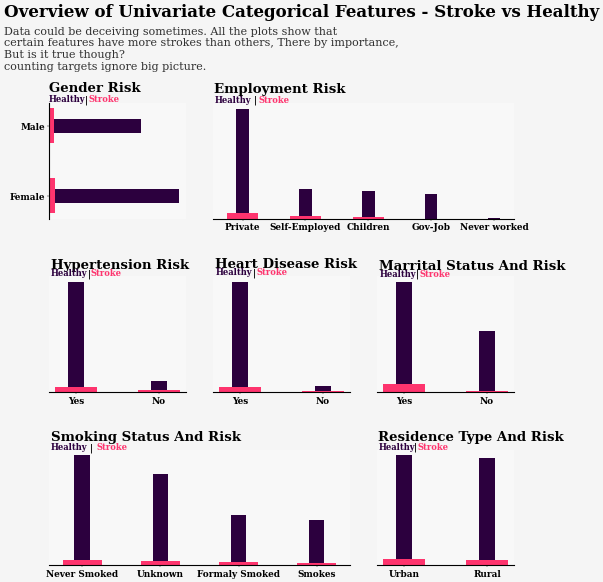

In [16]:
fig = plt.figure(figsize = (15,15),dpi = 40)

gs = fig.add_gridspec(3,3)
gs.update(wspace = 0.2, hspace = 0.5)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1:])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0:2])
ax7 = fig.add_subplot(gs[2,2])

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

fig.patch.set_facecolor('#f5f5f5')

# Setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')
    ax.spines['bottom'].set_linewidth(2)
    for loc in ['left', 'right', 'top']:
        ax.spines[loc].set_visible(False)
        ax.spines[loc].set_linewidth(2)


title_args = {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}
font_dict = {'size':16, 'family':'Serif', 'color':'black', 'weight':'bold'}
health_dict = {'font':'Serif', 'color': '#2c003e', 'size':15, 'weight':'bold'}
dash_dict = {'font':'Serif', 'color': 'black', 'size':15,'weight':'bold'}
stroke_dict = {'font':'Serif', 'color': '#fe346e', 'size':15,'weight':'bold'}

stroke_col = '#fe346e'
healthy_col = '#2c003e'

# Ax1: Gender- stroke distributions
healthy_gen = df_origin[df_origin['stroke'] == 0].gender.value_counts()
stroke_gen = df_origin[df_origin['stroke'] == 1].gender.value_counts()

ax1.barh( stroke_gen.index , width = healthy_gen.values[0:2], height = 0.2, color = healthy_col)
ax1.barh( np.arange(len(stroke_gen.index)) , width = stroke_gen.values, height = 0.5, color = stroke_col)
ax1.set_xticks(np.arange(len(healthy_gen.index))) 
ax1.set_yticklabels(stroke_gen.index, **font_dict)

ax1.axes.get_yaxis().set_visible(True)
ax1.axes.get_xaxis().set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(True)
ax1.text(0,1.5, 'Gender Risk',**title_args)
ax1.text(0,1.35, 'Healthy',**health_dict)
ax1.text(790,1.35, '|',**dash_dict)
ax1.text(870,1.35, 'Stroke',**stroke_dict)

# Ax2: work type - stroke distributions
healthy_gen = df_origin[df_origin['stroke'] == 0].work_type.value_counts()
stroke_gen = df_origin[df_origin['stroke'] == 1].work_type.value_counts()

ax2.bar(healthy_gen.index, height=healthy_gen.values, width=0.2, color=healthy_col)
ax2.bar(np.arange(len(stroke_gen.index)), height=stroke_gen.values, width=0.5, color=stroke_col)
# ax2.set_xticks(np.arange(len(healthy_gen.index))* 0.5)
ax2.set_xticklabels(['Private', 'Self-Employed', 'Children', 'Gov-Job', 'Never worked'], **font_dict)

ax2.text(-0.45,3200, 'Employment Risk',**title_args)
ax2.text(-0.45,2950, 'Healthy',**health_dict)
ax2.text(0.18,2950, '|',**dash_dict)
ax2.text(0.25,2950, 'Stroke',**stroke_dict)

# Ax3: hypertension - stroke distributions

healthy_gen = df_origin[df_origin['stroke'] == 0].hypertension.value_counts()
stroke_gen = df_origin[df_origin['stroke'] == 1].hypertension.value_counts()

ax3.bar(['Yes','No'] , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax3.bar( stroke_gen.index, height = stroke_gen.values, width = 0.5,color= stroke_col)
ax3.set_xticks(np.arange(len(healthy_gen.index))) 
ax3.set_xticklabels(['Yes','No'], **font_dict)

ax3.text(-0.3,5000, 'Hypertension Risk',**title_args)
ax3.text(-0.3,4700, 'Healthy',**health_dict)
ax3.text(0.14,4700, '|',**dash_dict)
ax3.text(0.18,4700, 'Stroke',**stroke_dict)


# Ax4: Heart Disease - stroke distributions

healthy_gen = df_origin[df_origin['stroke'] == 0].heart_disease.value_counts()
stroke_gen = df_origin[df_origin['stroke'] == 1].heart_disease.value_counts()

ax4.bar(['Yes','No'] , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax4.bar( stroke_gen.index, height = stroke_gen.values, width = 0.5,color= stroke_col)
ax4.set_xticks(np.arange(len(healthy_gen.index))) 
ax4.set_xticklabels(['Yes', 'No'],**font_dict)

ax4.text(-0.3,5250, 'Heart Disease Risk',**title_args)
ax4.text(-0.3,4950, 'Healthy',**health_dict)
ax4.text(0.15,4950, '|',**dash_dict)
ax4.text(0.20,4950, 'Stroke',**stroke_dict)


# Ax5: Married - stroke distributions
healthy_gen = df_origin[df_origin['stroke'] == 0].ever_married.value_counts()
stroke_gen = df_origin[df_origin['stroke'] == 1].ever_married.value_counts()

ax5.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax5.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col )
ax5.set_xticks(np.arange(len(healthy_gen.index))) 
ax5.set_xticklabels(healthy_gen.index, **font_dict)

ax5.text(-0.3,3500, 'Marrital Status And Risk',**title_args)
ax5.text(-0.3,3300, 'Healthy',**health_dict)
ax5.text(0.14,3300, '|',**dash_dict)
ax5.text(0.18,3300, 'Stroke',**stroke_dict)

# Ax6: Smoking status - stroke distributions

healthy_gen = df_origin[df_origin['stroke'] == 0].smoking_status.value_counts()
stroke_gen = df_origin[df_origin['stroke'] == 1].smoking_status.value_counts()

ax6.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2,color = healthy_col)
ax6.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col)
ax6.set_xticks(np.arange(len(healthy_gen.index))) 
ax6.set_xticklabels(['Never Smoked', 'Unknown','Formaly Smoked' ,'Smokes'], **font_dict)

ax6.text(-0.4,2050, 'Smoking Status And Risk',**title_args)
ax6.text(-0.4,1900, 'Healthy',**health_dict)
ax6.text(0.095,1900, '|',**dash_dict)
ax6.text(0.18,1900, 'Stroke',**stroke_dict)

# Ax7: Residence type - stroke distributions

healthy_gen = df_origin[df_origin['stroke'] == 0].Residence_type.value_counts()
stroke_gen = df_origin[df_origin['stroke'] == 1].Residence_type.value_counts()

ax7.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax7.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col)
ax7.set_xticks(np.arange(len(healthy_gen.index))) 
ax7.set_xticklabels(healthy_gen.index, **font_dict)

ax7.text(-0.31,2800, 'Residence Type And Risk',**title_args)
ax7.text(-0.31,2600, 'Healthy',**health_dict)
ax7.text(0.12,2600,'|',**dash_dict)
ax7.text(0.165,2600, 'Stroke',**stroke_dict)

fig.text(0.05,1.025, 'Overview of Univariate Categorical Features - Stroke vs Healthy', {'font':'Serif', 'color':'black','size':30, 'weight':'bold'})
fig.text(0.05,0.9375,'Data could be deceiving sometimes. All the plots show that\ncertain features have more strokes than others, There by importance, \nBut is it true though? \ncounting targets ignore big picture.',{'font':'Serif', 'color':'black','size':20, 'weight':'normal'}, alpha = 0.8)

plt.show()

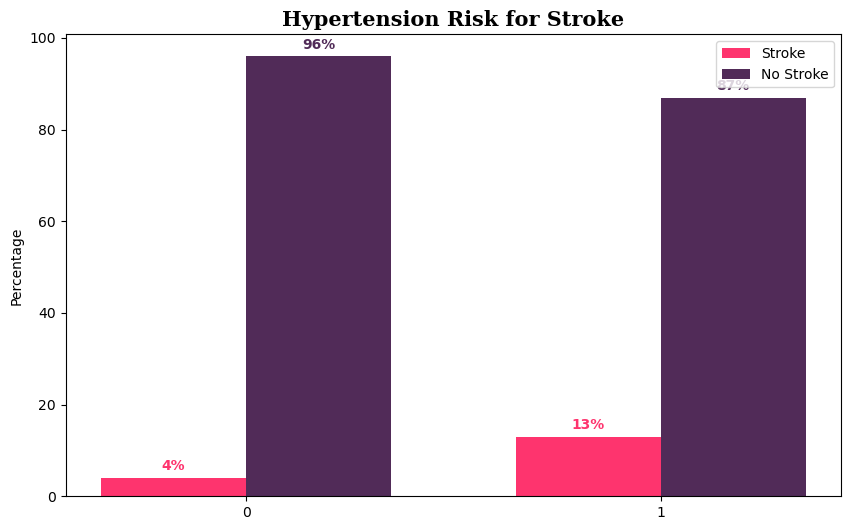

In [17]:
plot_categorical_stroke(df_origin, 'hypertension')

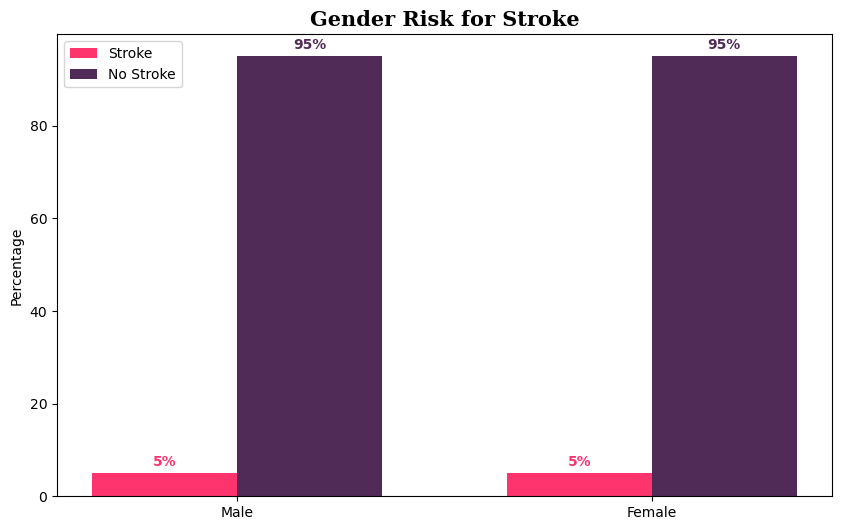

In [18]:
plot_categorical_stroke(df_origin, 'gender')

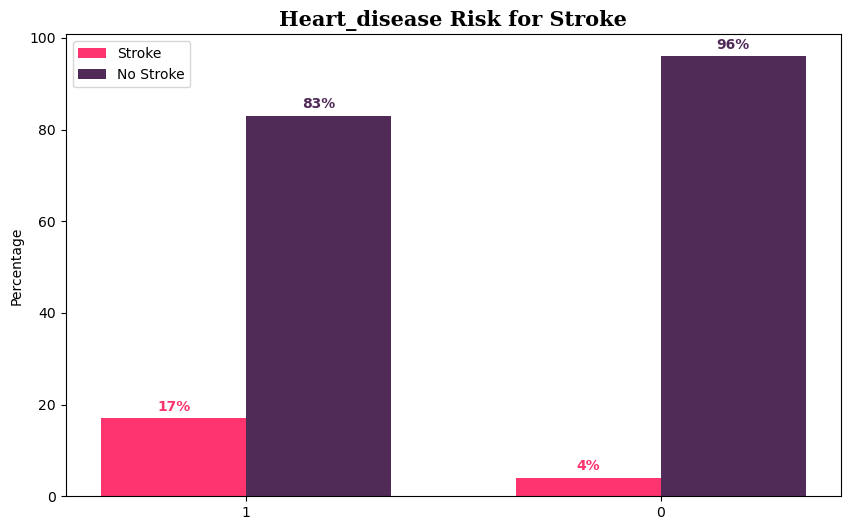

In [19]:
plot_categorical_stroke(df_origin, 'heart_disease')

### Relationship between two continous variables

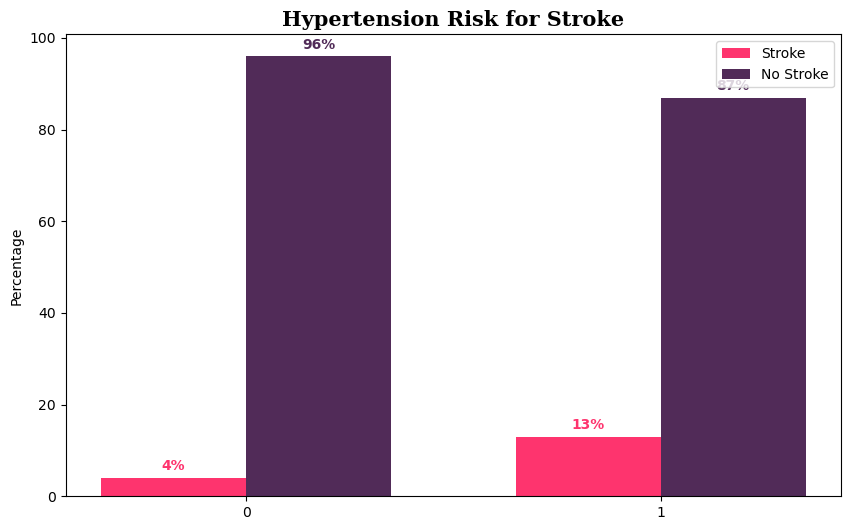

In [20]:
plot_categorical_stroke(df_origin, 'hypertension')

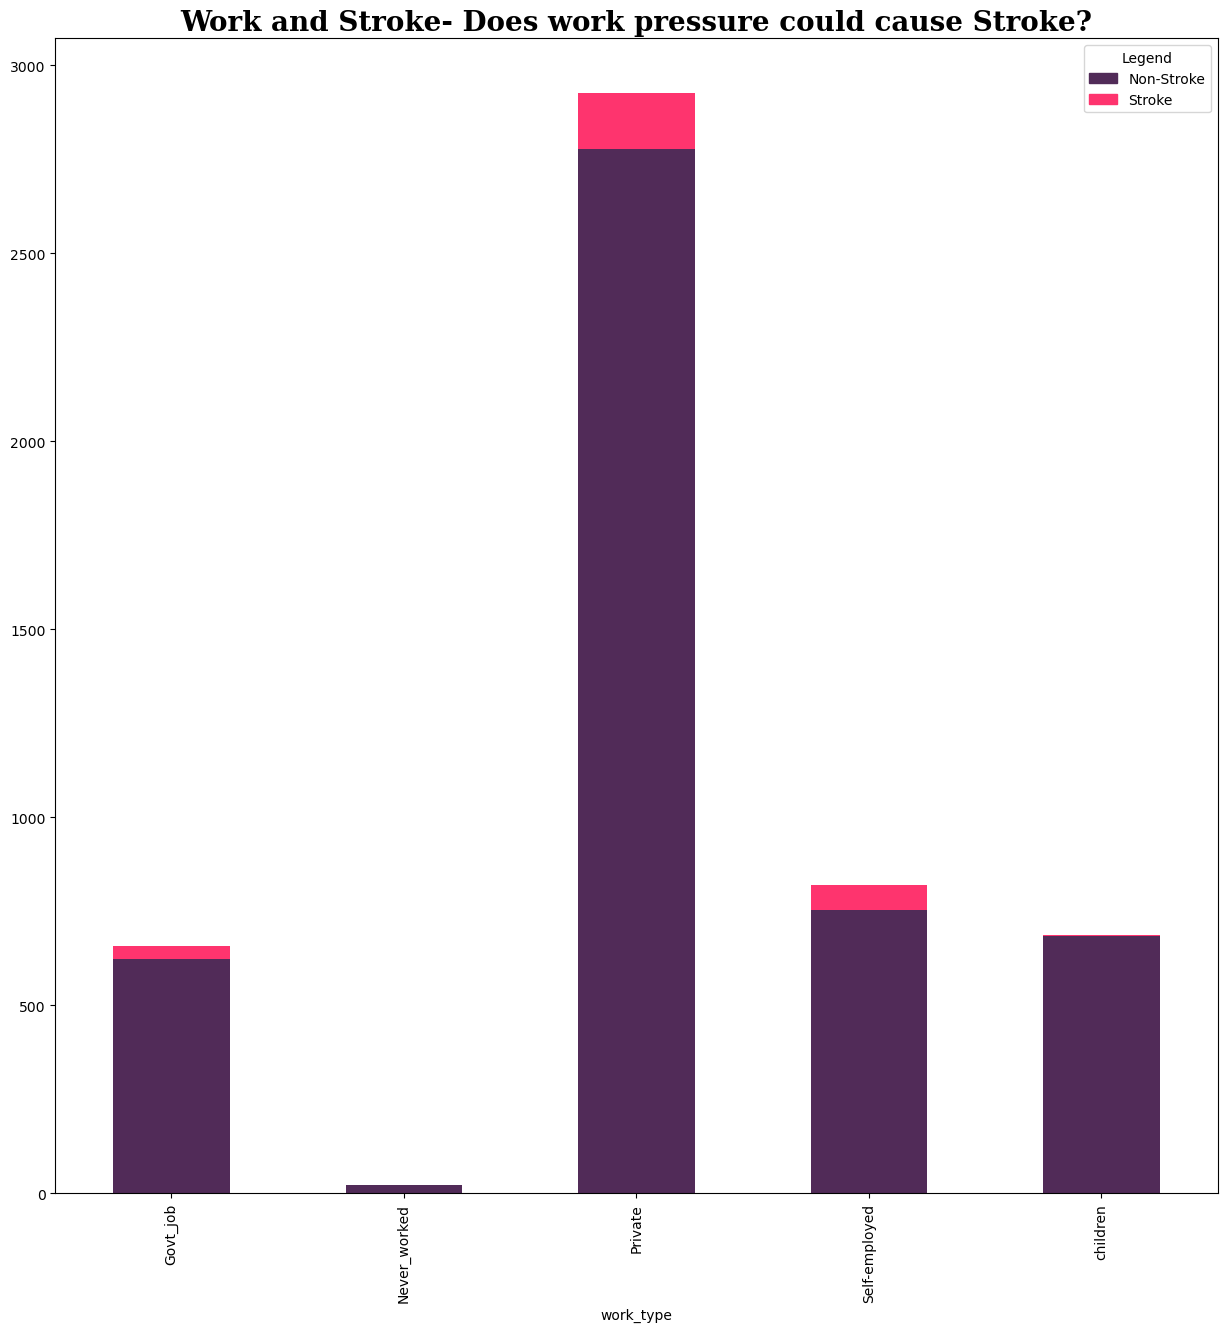

In [21]:
plot_stacking_bars(df_origin, 'work_type', 'stroke', title='Work and Stroke- Does work pressure could cause Stroke?')

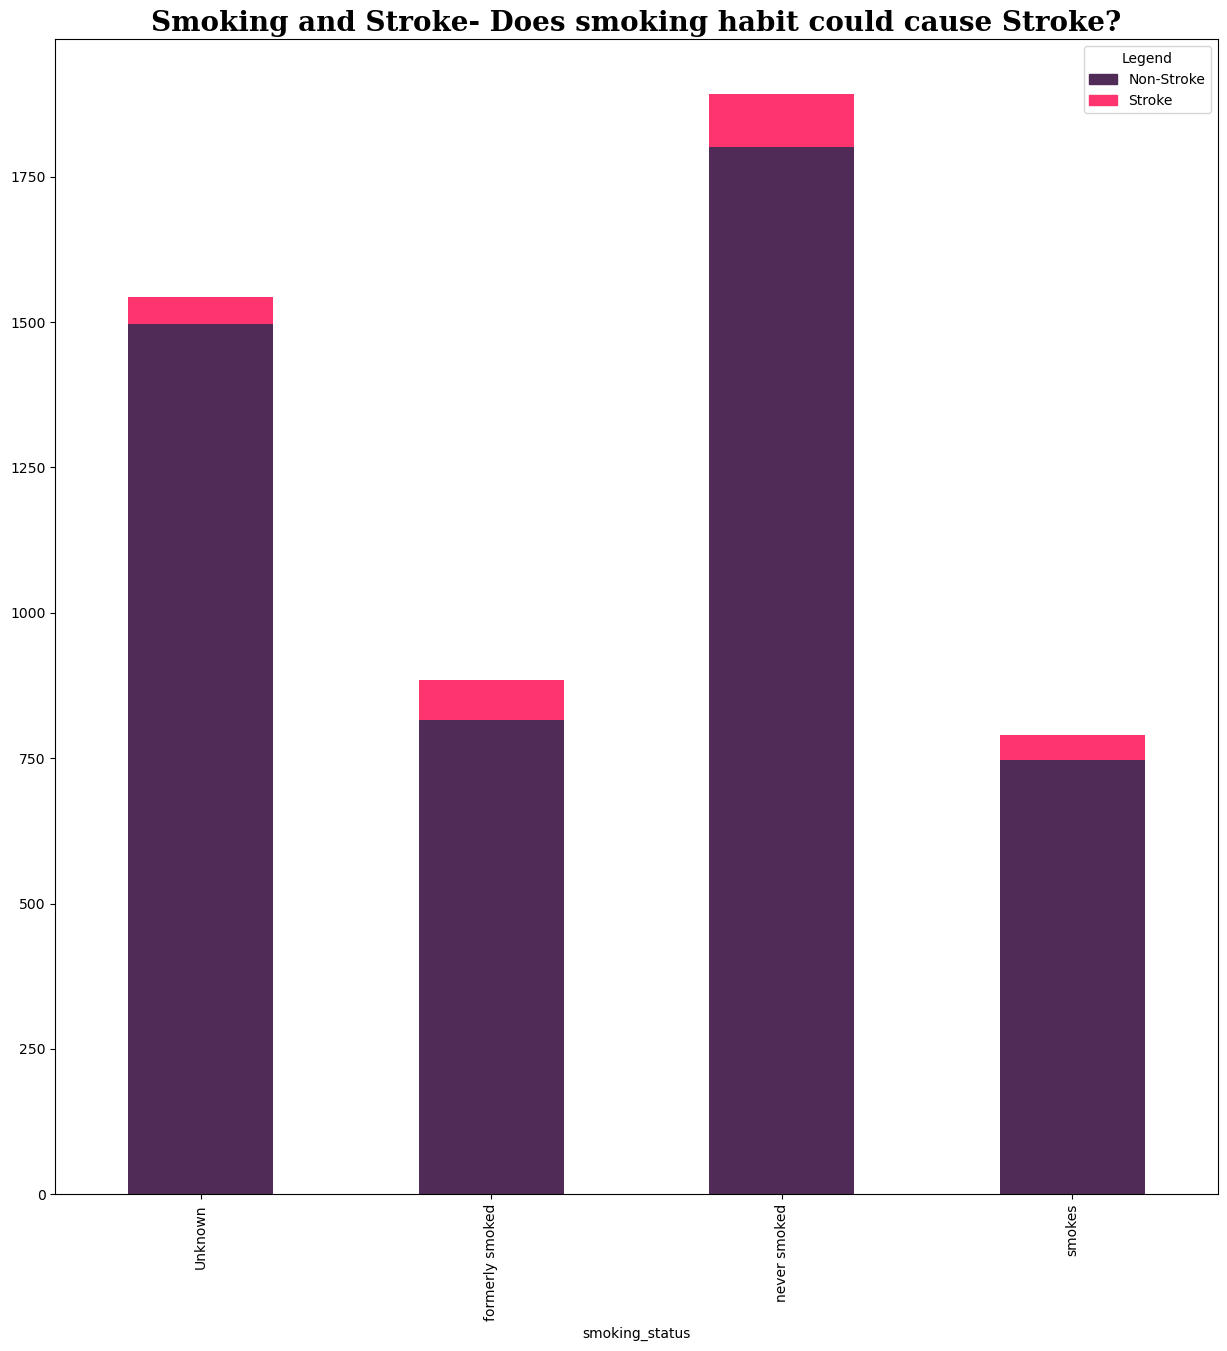

In [22]:
plot_stacking_bars(df_origin, 'smoking_status', 'stroke', title='Smoking and Stroke- Does smoking habit could cause Stroke?')

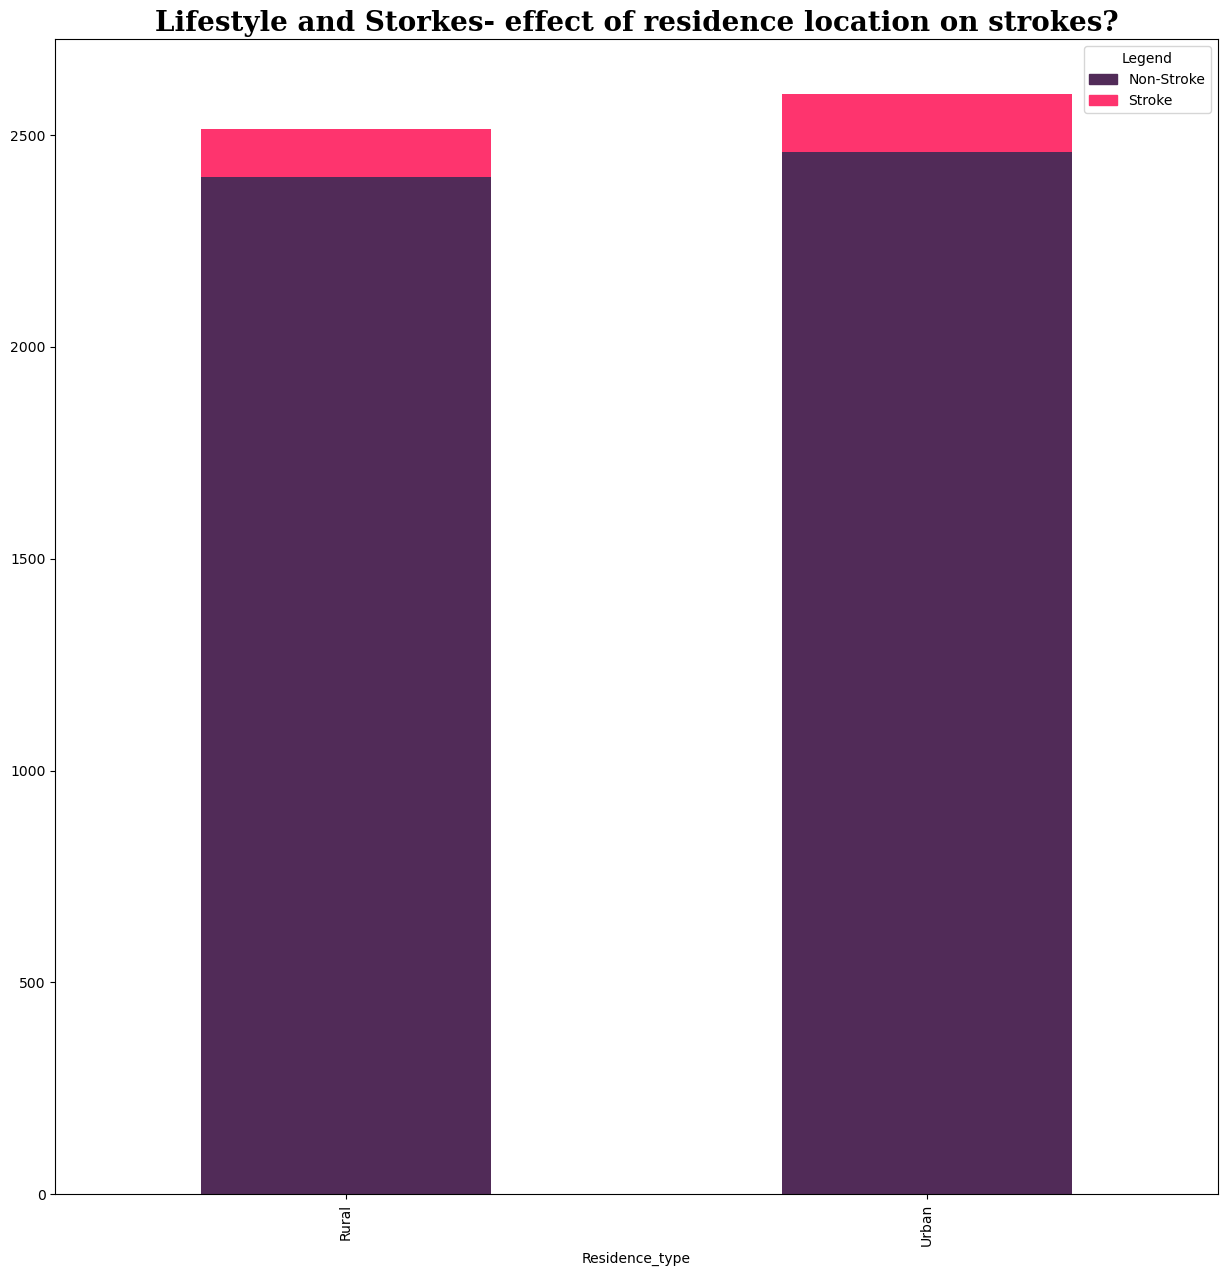

In [23]:
plot_stacking_bars(df_origin, 'Residence_type', 'stroke', title='Lifestyle and Storkes- effect of residence location on strokes?')

### Plot Gender and Mariage Corr with Stroke

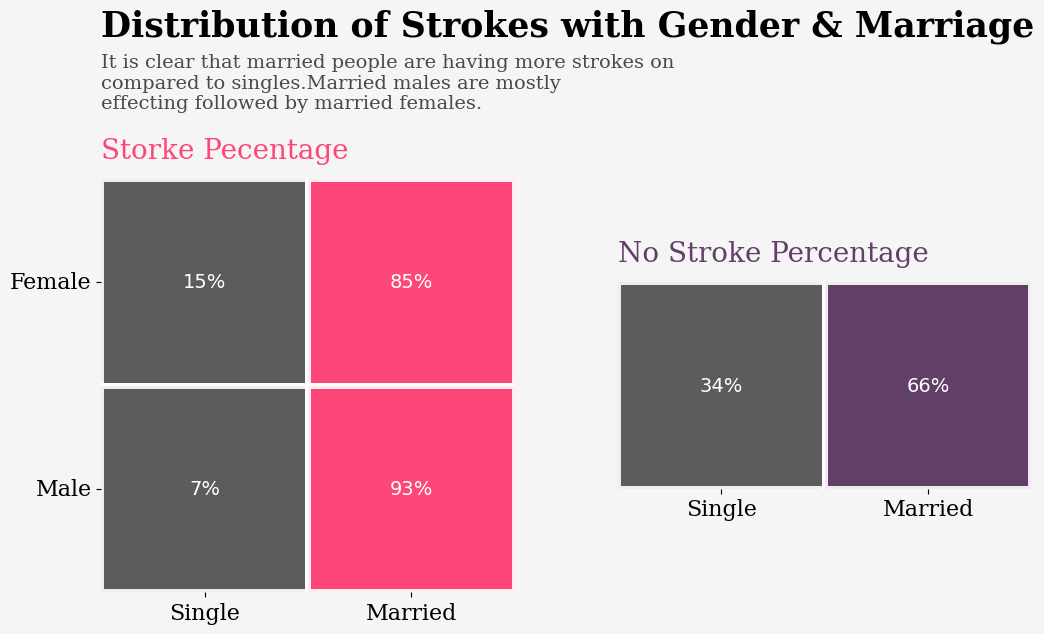

In [24]:
fig = plt.figure(figsize=(12,6),dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]

col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['ever_married']],normalize='index')
no_stroke = pd.crosstab(healthy['gender'],[healthy['ever_married']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

ax0.text(0, -0.69, 'Distribution of Strokes with Gender & Marriage', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.34, 'It is clear that married people are having more strokes on \ncompared to singles.Married males are mostly \neffecting followed by married females.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

# Set tick labels with the correct font dictionary
ax0.set_xticklabels(['Single', 'Married'], fontdict={'fontname':'serif', 'color':'black', 'size':16})
ax1.set_xticklabels(['Single', 'Married'], fontdict={'fontname':'serif', 'color':'black', 'size':16})

# For y-axis labels, since there's only one set of labels, you don't need to call set_yticklabels twice
ax0.set_yticklabels(['Female', 'Male'], fontdict={'fontname':'serif', 'color':'black', 'size':16}, rotation=0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_29004\1793030128.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


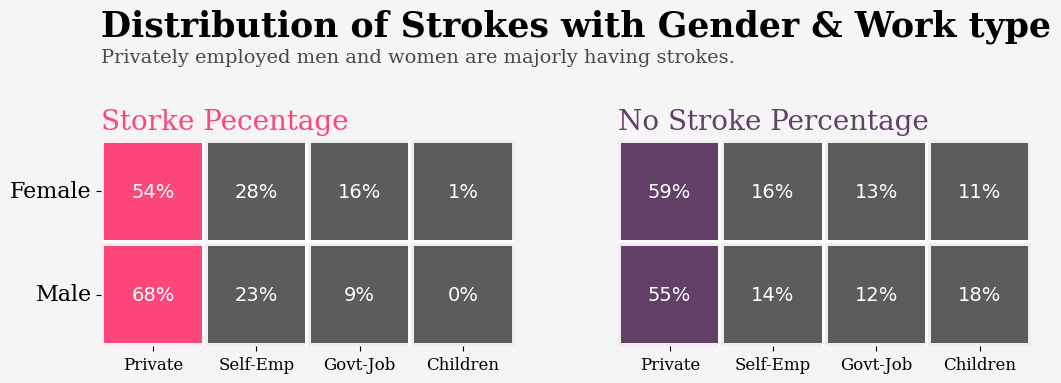

In [25]:
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

healthy = df_origin[df_origin['stroke']==0]
stroke = df_origin[df_origin['stroke']==1]

gender_order = ['Female','Male']
work_order = ['Private', 'Self-employed','Govt_job', 'children']

col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['work_type']],normalize='index').loc[gender_order,work_order]
no_stroke = pd.crosstab(healthy['gender'],[healthy['work_type']], normalize='index').loc[gender_order,work_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

ax0.text(0, -1., 'Distribution of Strokes with Gender & Work type', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.75, 'Privately employed men and women are majorly having strokes.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(['Private', 'Self-Emp','Govt-Job', 'Children'], fontdict={'font':'serif', 'color':'black', 'size':12})
ax1.axes.set_xticklabels(['Private', 'Self-Emp','Govt-Job', 'Children'], fontdict={'font':'serif', 'color':'black', 'size':12})

ax0.axes.set_yticklabels(gender_order, fontdict={'font':'serif', 'color':'black', 'size':16}, rotation = 0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

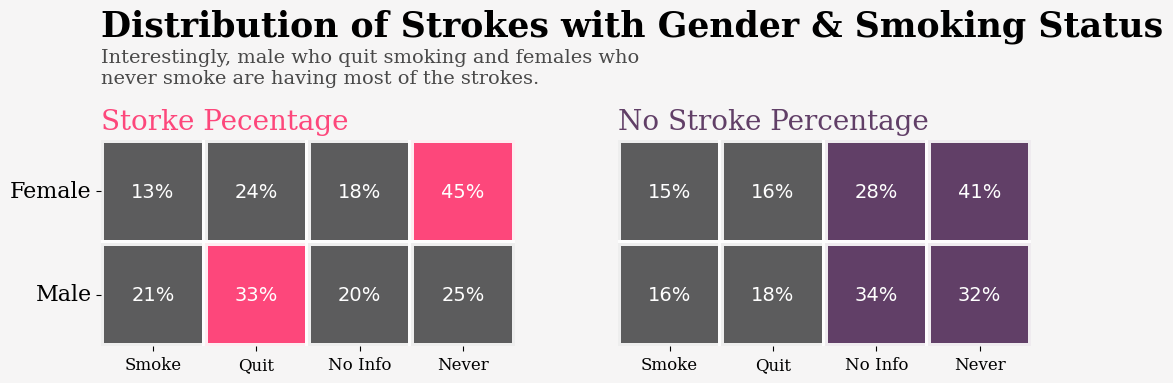

In [26]:
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

healthy = df_origin[df_origin['stroke']==0]
stroke = df_origin[df_origin['stroke']==1]

gender_order = ['Female','Male']
smoking_order = ['smokes', 'formerly smoked', 'Unknown', 'never smoked']

col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['smoking_status']],normalize='index').loc[gender_order,smoking_order]
no_stroke = pd.crosstab(healthy['gender'],[healthy['smoking_status']], normalize='index').loc[gender_order,smoking_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

ax0.text(0, -1., 'Distribution of Strokes with Gender & Smoking Status', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.55, 'Interestingly, male who quit smoking and females who \nnever smoke are having most of the strokes.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

ax0.set_xticklabels(['Smoke', 'Quit', 'No Info', 'Never'], fontdict={'font': 'serif', 'color': 'black', 'size': 12})
ax1.set_xticklabels(['Smoke', 'Quit', 'No Info', 'Never'], fontdict={'font': 'serif', 'color': 'black', 'size': 12})

ax0.axes.set_yticklabels(gender_order, fontdict={'font':'serif', 'color':'black', 'size':16}, rotation = 0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_29004\972099111.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


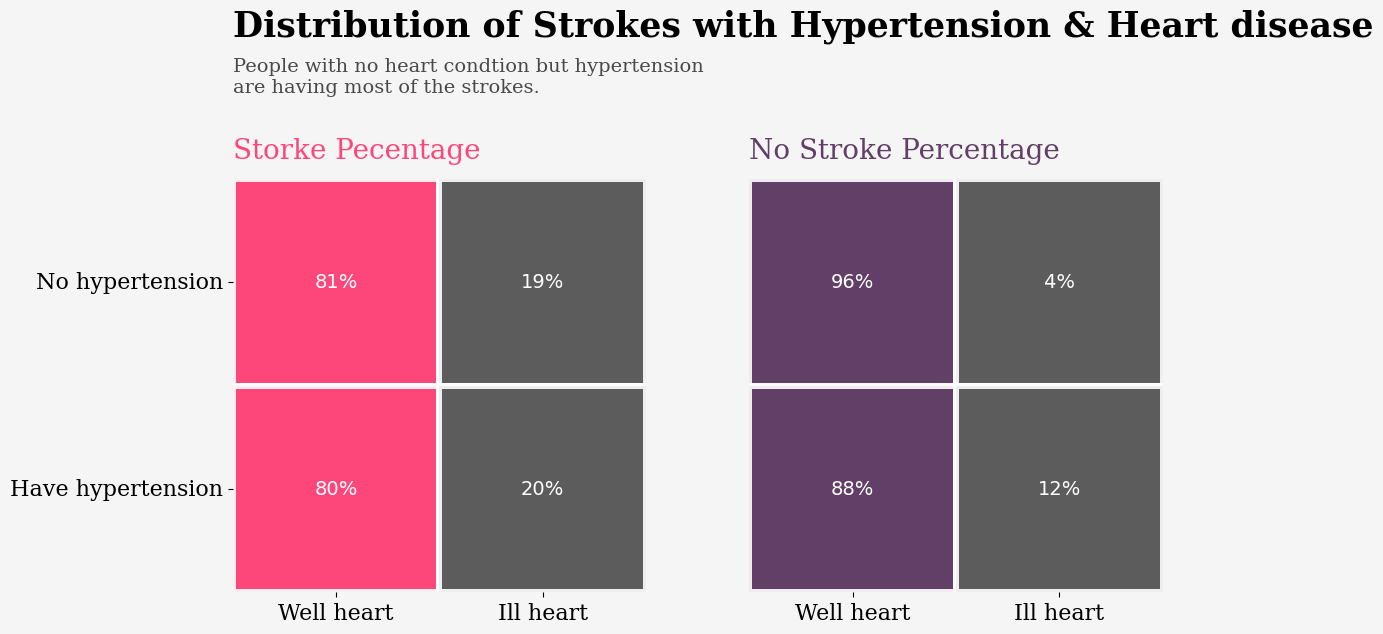

In [27]:
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

healthy = df_origin[df_origin['stroke']==0]
stroke = df_origin[df_origin['stroke']==1]

col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['hypertension'],[stroke['heart_disease']],normalize='index')
no_stroke = pd.crosstab(healthy['hypertension'],[healthy['heart_disease']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

ax0.text(0, -0.69, 'Distribution of Strokes with Hypertension & Heart disease', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.42, 'People with no heart condtion but hypertension \nare having most of the strokes.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(['Well heart', 'Ill heart'], fontdict={'font':'serif', 'color':'black', 'size':16})
ax1.axes.set_xticklabels(['Well heart', 'Ill heart'], fontdict={'font':'serif', 'color':'black', 'size':16})

ax0.axes.set_yticklabels(['No hypertension', 'Have hypertension'], fontdict={'font':'serif', 'color':'black', 'size':16}, rotation= 0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

### Plot Feature Correlation

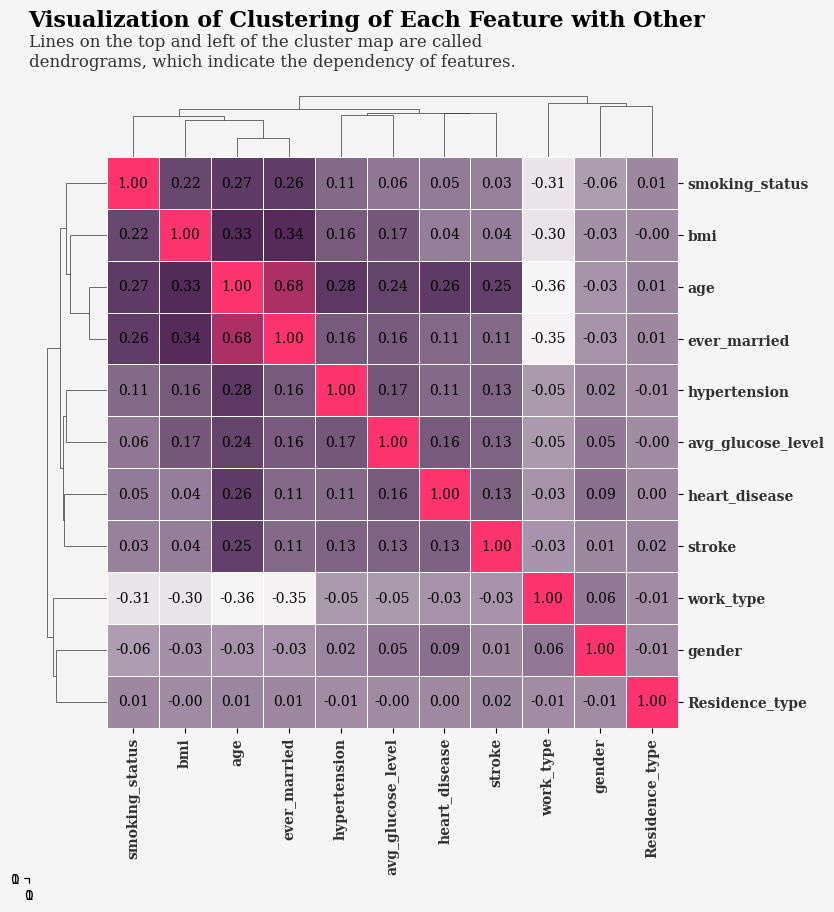

In [28]:
plot_correlation_heatmap(df)

## Initialize dictionaries to store every model outputs

In [29]:
predictions = {
    1: { # Dataset 1
        'Stroke': [],
        'Stroke After Standard Scaler':[]
    },
    2: { # Dataset 2
        'Stroke': [],
        'Stroke After Standard Scaler': []
    }
}

# Classification

## Convolutional Neural Network (CNN)

In [30]:
cnn, y_pred_cnn, cnn_accuracy, cnn_hist = cnn_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Number of classes:  2


Epoch 1/50


183/183 [==============================] - 2s 4ms/step - loss: 0.5764 - accuracy: 0.7027 - val_loss: 0.5067 - val_accuracy: 0.7434
Epoch 2/50
183/183 [==============================] - 1s 3ms/step - loss: 0.4927 - accuracy: 0.7565 - val_loss: 0.4721 - val_accuracy: 0.7620
Epoch 3/50
183/183 [==============================] - 1s 3ms/step - loss: 0.4808 - accuracy: 0.7661 - val_loss: 0.4420 - val_accuracy: 0.7882
Epoch 4/50
183/183 [==============================] - 1s 3ms/step - loss: 0.4515 - accuracy: 0.7833 - val_loss: 0.4221 - val_accuracy: 0.7990
Epoch 5/50
183/183 [==============================] - 1s 3ms/step - loss: 0.4301 - accuracy: 0.7937 - val_loss: 0.3953 - val_accuracy: 0.8113
Epoch 6/50
183/183 [==============================] - 1s 3ms/step - loss: 0.4226 - accuracy: 0.7992 - val_loss: 0.3946 - val_accuracy: 0.8180
Epoch 7/50
183/183 [==============================] - 1s 3ms/step - loss: 0.4123 - accuracy: 0.8093 - val_loss: 0.4241 - v

## Multilayer Perceptron (MLP)

In [31]:
mlp, y_pred_mlp, mlp_accuracy = mlp_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Train Accuracy:  0.9010631001371742
Test Accuracy:  0.8724935732647815
Validation Accuracy:  0.8637532133676092 

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       994
           1       0.84      0.92      0.88       951

    accuracy                           0.87      1945
   macro avg       0.88      0.87      0.87      1945
weighted avg       0.88      0.87      0.87      1945



## Support Vector Machine (SVM)

In [32]:
svm, y_pred_svm, svm_accuracy = svm_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Train Accuracy:  0.8120713305898491
Test Accuracy:  0.7953727506426735
Validation Accuracy:  0.8149100257069408 

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       994
           1       0.77      0.84      0.80       951

    accuracy                           0.80      1945
   macro avg       0.80      0.80      0.80      1945
weighted avg       0.80      0.80      0.80      1945



## Decision Tree (DT)

In [33]:
dt, y_pred_dt, dt_accuracy = dt_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Train Accuracy:  0.9986282578875172
Test Accuracy:  0.9033419023136247
Validation Accuracy:  0.910025706940874 

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       994
           1       0.89      0.92      0.90       951

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945



## Random Forest (RF)

In [34]:
rf, y_pred_rf, rf_accuracy = rf_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Train Accuracy:  1.0
Test Accuracy:  0.9455012853470437
Validation Accuracy:  0.9439588688946016 

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       994
           1       0.93      0.96      0.95       951

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



## LightGBM

In [35]:
lgbm, y_pred_lgbm, lgbm_accuracy = lgbm_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Train Accuracy:  1.0
Test Accuracy:  0.961439588688946
Validation Accuracy:  0.957840616966581 

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       994
           1       0.96      0.97      0.96       951

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



## XGBoost

In [36]:
xgb, y_pred_xgb, xgb_accuracy = xgboost_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Train Accuracy:  0.9967421124828533
Test Accuracy:  0.9408740359897172
Validation Accuracy:  0.9403598971722366 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       994
           1       0.93      0.95      0.94       951

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



## CatBoost

In [37]:
cat, y_pred_cat, cat_accuracy = catboost_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Learning rate set to 0.180692
0:	learn: 0.6231427	total: 139ms	remaining: 13.8s
1:	learn: 0.5703543	total: 141ms	remaining: 6.93s
2:	learn: 0.5304535	total: 144ms	remaining: 4.65s
3:	learn: 0.4999097	total: 146ms	remaining: 3.5s
4:	learn: 0.4764466	total: 148ms	remaining: 2.81s
5:	learn: 0.4580716	total: 150ms	remaining: 2.35s
6:	learn: 0.4415017	total: 152ms	remaining: 2.02s
7:	learn: 0.4289174	total: 154ms	remaining: 1.78s
8:	learn: 0.4137400	total: 156ms	remaining: 1.58s
9:	learn: 0.4028971	total: 158ms	remaining: 1.42s
10:	learn: 0.3928103	total: 159ms	remaining: 1.29s
11:	learn: 0.3861167	total: 161ms	remaining: 1.18s
12:	learn: 0.3779711	total: 162ms	remaining: 1.09s
13:	learn: 0.3717725	total: 164ms	remaining: 1.01s
14:	learn: 0.3655424	total: 165ms	remaining: 936ms
15:	learn: 0.3613790	total: 167ms	remaining: 876ms
16:	learn: 0.3553525	total: 168ms	remaining: 822ms
17:	learn: 0.3500859	total: 170ms	remaining: 774ms
18:	learn: 0.3455190	total: 171ms	remaining: 731ms
19:	learn: 0

# Hyperparameter Tuning

## Parameter Setting

In [38]:
# Define the parameter grid for MLP
params_grid_mlp = {
    'hidden_layer_sizes': [(200, 200, 200), (300, 300, 300)],
    'activation': ['relu'],
    'solver': ['adam'],
    'max_iter': [500],
    'random_state': [101],
}

# Define the parameter grid for SVM
params_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr'],
    'probability': [True],
    'random_state': [101]
}

# Define the parameter grid for DT
params_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'random_state': [101]
}

# Define the parameter grid for RF
params_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30, 40],
    'bootstrap': [True],
    'max_features': [10, 20, 30],
    'random_state': [101],
}

# Define the parameter grid for LightGBM
params_grid_lgbm = {
    'num_leaves': [64, 128],
    'min_split_gain': [0.0, 0.1],
    'learning_rate': [0.1, 0.2],
    'max_depth': [15, 25],
    'n_estimators': [500, 600],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8],
    'verbose': [-1],
    'random_state': [101]
}

# Define the parameter grid for XGBoost
params_grid_xgb = {
    'n_estimators': [200, 300, 350],
    'learning_rate': [0.1, 0.5],
    'max_depth': [8, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8],
    'random_state': [101],
}

# Define the parameter grid for CatBoost
params_grid_cat = {
    'n_estimators': [50, 100, 200, 300],
    'random_state': [42, 101],
    'learning_rate': [0.01, 0.1, 0.5],
}

## CNN

In [39]:
# Assuming you have defined X_train, y_train, X_test, and y_test
cnn, best_param_cnn, y_pred_cnn, cnn_accuracy, cnn_history = cnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid, epochs=100)

Reloading Tuner from dir\cnn_hyperparameter_tuning\tuner0.json
Epoch 1/100
183/183 [==============================] - 1s 3ms/step - loss: 0.5836 - accuracy: 0.7186 - val_loss: 0.5230 - val_accuracy: 0.7455
Epoch 2/100
183/183 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.7521 - val_loss: 0.5353 - val_accuracy: 0.7584
Epoch 3/100
183/183 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7503 - val_loss: 0.4877 - val_accuracy: 0.7429
Epoch 4/100
183/183 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7630 - val_loss: 0.4953 - val_accuracy: 0.7738
Epoch 5/100
183/183 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7666 - val_loss: 0.5012 - val_accuracy: 0.7512
Epoch 6/100
183/183 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7752 - val_loss: 0.4972 - val_accuracy: 0.7558
Epoch 7/100
183/183 [==============================] - 0s 3ms/step - loss: 0.48

## MLP

In [40]:
mlp, best_param_mlp, y_pred_mlp, mlp_accuracy = hyperparameter_tuning('mlp', params_grid_mlp, X_train, y_train, X_test, y_test, verbose=1)

Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (200, 200, 200), 'max_iter': 500, 'random_state': 101, 'solver': 'adam'}
Testing Accuracy: 0.9125964010282777

Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (300, 300, 300), 'max_iter': 500, 'random_state': 101, 'solver': 'adam'}
Testing Accuracy: 0.9084832904884319

Best Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (200, 200, 200), 'max_iter': 500, 'random_state': 101, 'solver': 'adam'}
Best Testing Accuracy: 0.9125964010282777


## SVM

In [41]:
svm, best_param_svm, y_pred_svm, svm_accuracy = hyperparameter_tuning('svm', params_grid_svm, X_train, y_train, X_test, y_test, verbose=1)

Hyperparameters: {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'random_state': 101}
Testing Accuracy: 0.7511568123393316

Hyperparameters: {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf', 'probability': True, 'random_state': 101}
Testing Accuracy: 0.8524421593830335

Hyperparameters: {'C': 0.1, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'random_state': 101}
Testing Accuracy: 0.7511568123393316

Hyperparameters: {'C': 0.1, 'decision_function_shape': 'ovr', 'gamma': 'auto', 'kernel': 'rbf', 'probability': True, 'random_state': 101}
Testing Accuracy: 0.8524421593830335

Hyperparameters: {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'random_state': 101}
Testing Accuracy: 0.7562982005141388

Hyperparameters: {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf', 'probability': True, 'ran

## DT

In [42]:
dt, best_param_dt, y_pred_dt, dt_accuracy = hyperparameter_tuning('dt', params_grid_dt, X_train, y_train, X_test, y_test, verbose=1)

Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 101}
Testing Accuracy: 0.9028277634961439

Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 101}
Testing Accuracy: 0.9012853470437018

Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 101}
Testing Accuracy: 0.8915167095115681

Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 101}
Testing Accuracy: 0.8956298200514139

Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 101}
Testing Accuracy: 0.8982005141388175

Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 101}
Testing Accuracy: 0.8925449871465295

Hyperparameters: {'criteri

## RF

In [43]:
rf, best_param_rf, y_pred_rf, rf_accuracy = hyperparameter_tuning('rf', params_grid_rf, X_train, y_train, X_test, y_test, verbose=1)

Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 10, 'n_estimators': 100, 'random_state': 101}
Testing Accuracy: 0.9460154241645244

Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 10, 'n_estimators': 200, 'random_state': 101}
Testing Accuracy: 0.9475578406169666

Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 20, 'n_estimators': 100, 'random_state': 101}
Testing Accuracy: 0.9460154241645244

Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 20, 'n_estimators': 200, 'random_state': 101}
Testing Accuracy: 0.9475578406169666

Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 30, 'n_estimators': 100, 'random_state': 101}
Testing Accuracy: 0.9460154241645244

Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 30, 'n_estimators': 200, 'random_state': 101}
Testing Accuracy: 0.9475578406169666

Hyperparameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 10, 'n

## LightGBM

In [44]:
lgbm, best_param_lgbm, y_pred_lgbm, lgbm_accuracy = hyperparameter_tuning('lgbm', params_grid_lgbm, X_train, y_train, X_test, y_test, verbose=1)

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 15, 'min_split_gain': 0.0, 'n_estimators': 500, 'num_leaves': 64, 'random_state': 101, 'subsample': 0.6, 'verbose': -1}
Testing Accuracy: 0.9573264781491002

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 15, 'min_split_gain': 0.0, 'n_estimators': 500, 'num_leaves': 64, 'random_state': 101, 'subsample': 0.8, 'verbose': -1}
Testing Accuracy: 0.9573264781491002

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 15, 'min_split_gain': 0.0, 'n_estimators': 500, 'num_leaves': 64, 'random_state': 101, 'subsample': 1.0, 'verbose': -1}
Testing Accuracy: 0.9573264781491002

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 15, 'min_split_gain': 0.0, 'n_estimators': 500, 'num_leaves': 128, 'random_state': 101, 'subsample': 0.6, 'verbose': -1}
Testing Accuracy: 0.9604113110539846

Hyperparameters: {'colsample_bytree': 0.6, 'learning_ra

## XGBoost

In [45]:
xgb, best_param_xgb, y_pred_xgb, xgb_accuracy = hyperparameter_tuning('xgb', params_grid_xgb, X_train, y_train, X_test, y_test, verbose=1)

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 200, 'random_state': 101, 'subsample': 0.8}
Testing Accuracy: 0.9403598971722366

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 200, 'random_state': 101, 'subsample': 1.0}
Testing Accuracy: 0.9429305912596401

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 300, 'random_state': 101, 'subsample': 0.8}
Testing Accuracy: 0.9413881748071979

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 300, 'random_state': 101, 'subsample': 1.0}
Testing Accuracy: 0.9429305912596401

Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 350, 'random_state': 101, 'subsample': 0.8}
Testing Accuracy: 0.94241645

## CatBoost

In [46]:
cat, best_param_cat, y_pred_cat, cat_accuracy = hyperparameter_tuning('cat', params_grid_cat, X_train, y_train, X_test, y_test, verbose=1)

0:	learn: 0.6889422	total: 2.83ms	remaining: 139ms
1:	learn: 0.6847780	total: 5.93ms	remaining: 142ms
2:	learn: 0.6805945	total: 8.56ms	remaining: 134ms
3:	learn: 0.6766344	total: 11.1ms	remaining: 128ms
4:	learn: 0.6727777	total: 13.6ms	remaining: 122ms
5:	learn: 0.6689415	total: 16.2ms	remaining: 119ms
6:	learn: 0.6651162	total: 18.9ms	remaining: 116ms
7:	learn: 0.6614692	total: 21.4ms	remaining: 112ms
8:	learn: 0.6579270	total: 23.8ms	remaining: 108ms
9:	learn: 0.6543775	total: 26.3ms	remaining: 105ms
10:	learn: 0.6506346	total: 28.7ms	remaining: 102ms
11:	learn: 0.6473318	total: 31.3ms	remaining: 99ms
12:	learn: 0.6441357	total: 33.7ms	remaining: 95.8ms
13:	learn: 0.6408007	total: 36.2ms	remaining: 93.2ms
14:	learn: 0.6374380	total: 38.8ms	remaining: 90.6ms
15:	learn: 0.6340911	total: 41.2ms	remaining: 87.5ms
16:	learn: 0.6308164	total: 43.7ms	remaining: 84.9ms
17:	learn: 0.6278656	total: 46.4ms	remaining: 82.6ms
18:	learn: 0.6248815	total: 48.9ms	remaining: 79.8ms
19:	learn: 0.621

## Store Results

In [47]:
# Store results to dictionaries Stroke
predictions[1]['Stroke'].append(('CNN', cnn, y_pred_cnn, y_test, cnn_accuracy, best_param_cnn, cnn_hist))
predictions[1]['Stroke'].append(('MLP', mlp, y_pred_mlp, y_test, mlp_accuracy, best_param_mlp))
predictions[1]['Stroke'].append(('SVM', svm, y_pred_svm, y_test, svm_accuracy, best_param_svm))
predictions[1]['Stroke'].append(('Decision Tree', dt, y_pred_dt, y_test, dt_accuracy, best_param_dt))
predictions[1]['Stroke'].append(('RF', rf, y_pred_rf, y_test, rf_accuracy, best_param_rf))
predictions[1]['Stroke'].append(('LightGBM', lgbm, y_pred_lgbm, y_test, lgbm_accuracy, best_param_lgbm))
predictions[1]['Stroke'].append(('XGBoost', xgb, y_pred_xgb, y_test, xgb_accuracy, best_param_xgb))
predictions[1]['Stroke'].append(('CatBoost', cat, y_pred_cat, y_test, cat_accuracy, best_param_cat))

# Visualizations

## Error Analysis

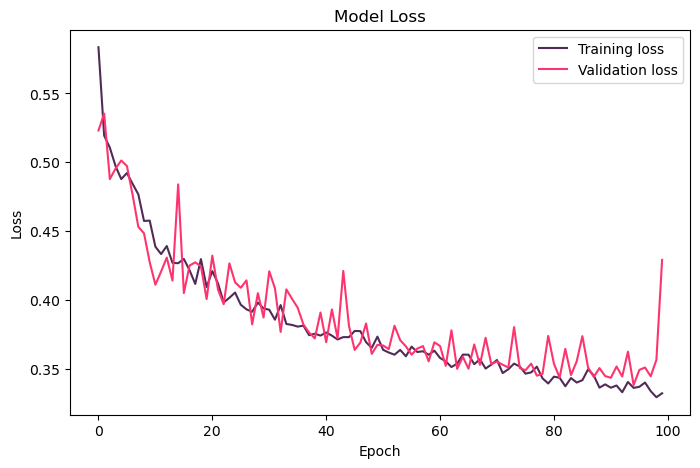

In [48]:
plot_history(cnn_history)

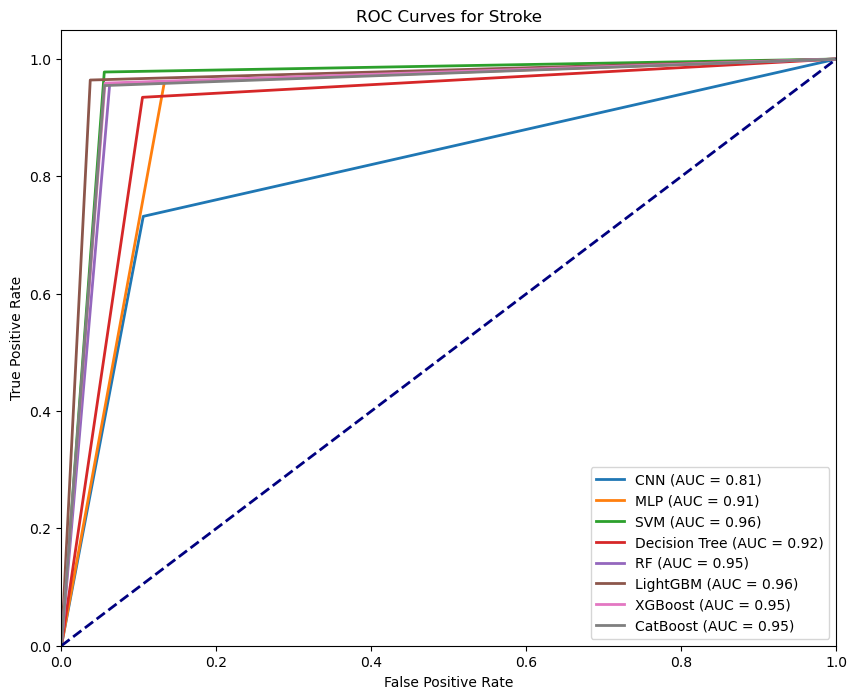

In [49]:
plot_all_roc_curves(predictions, 1, 'Stroke')

## Performance Evaluation

In [50]:
metrics = {
    'CNN': {'Best Parameter': best_param_cnn.get_config(), 'Accuracy': cnn_accuracy},
    'MLP': {'Best Parameter': best_param_mlp, 'Accuracy': mlp_accuracy},
    'SVM': {'Best Parameter': best_param_svm, 'Accuracy': svm_accuracy},
    'Decision Tree': {'Best Parameter': best_param_dt, 'Accuracy': dt_accuracy},
    'Random Forest': {'Best Parameter': best_param_rf, 'Accuracy': rf_accuracy},
    'LightGBM': {'Best Parameter': best_param_lgbm, 'Accuracy': lgbm_accuracy},
    'XGBoost': {'Best Parameter': best_param_xgb, 'Accuracy': xgb_accuracy},
    'CatBoost': {'Best Parameter': best_param_cat, 'Accuracy': cat_accuracy},
}

# Call print metrics
display_metrics(metrics)

Model           Best Parameter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

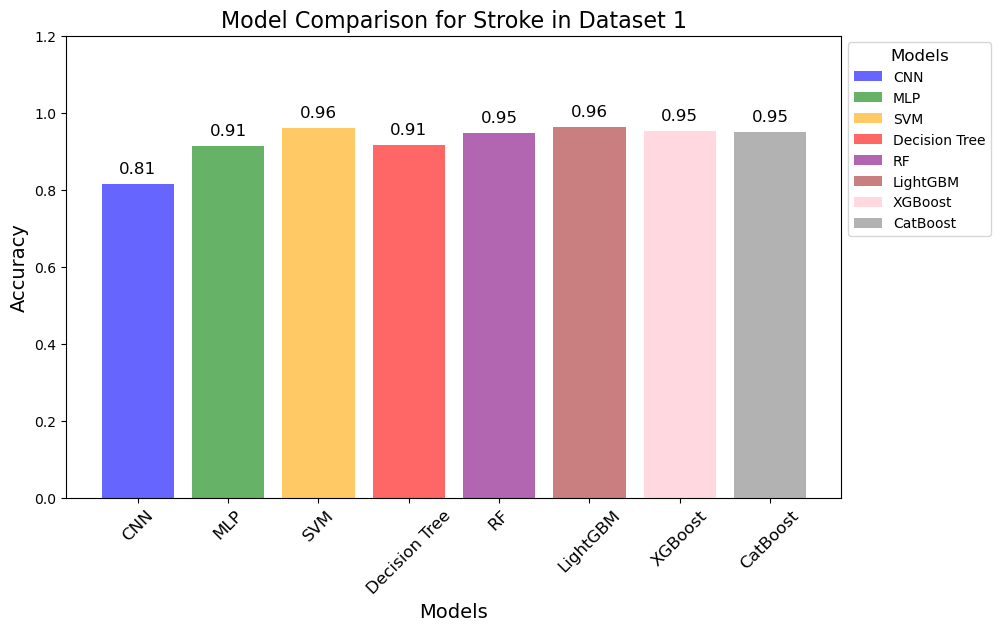

In [51]:
plot_comparison(predictions, 1, 'Stroke')

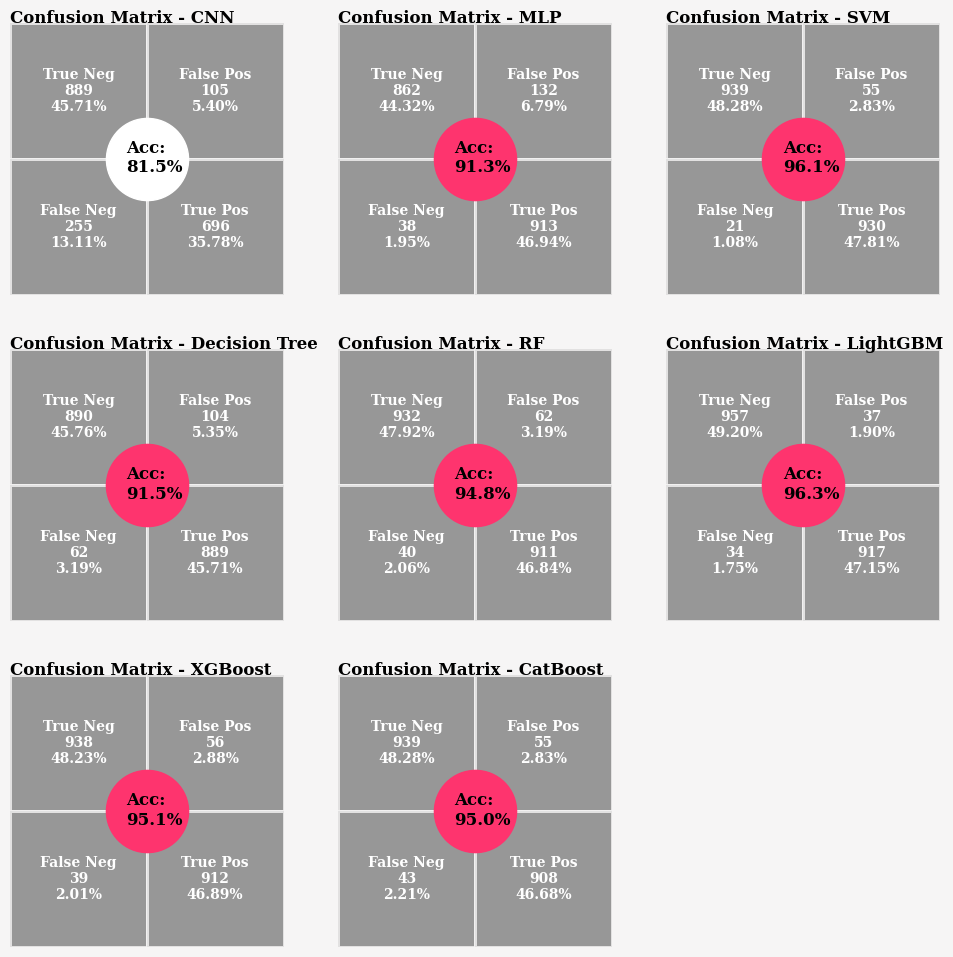

In [52]:
plot_confusion_matrices(predictions, 1, 'Stroke')

## Feature Importance Visualizations

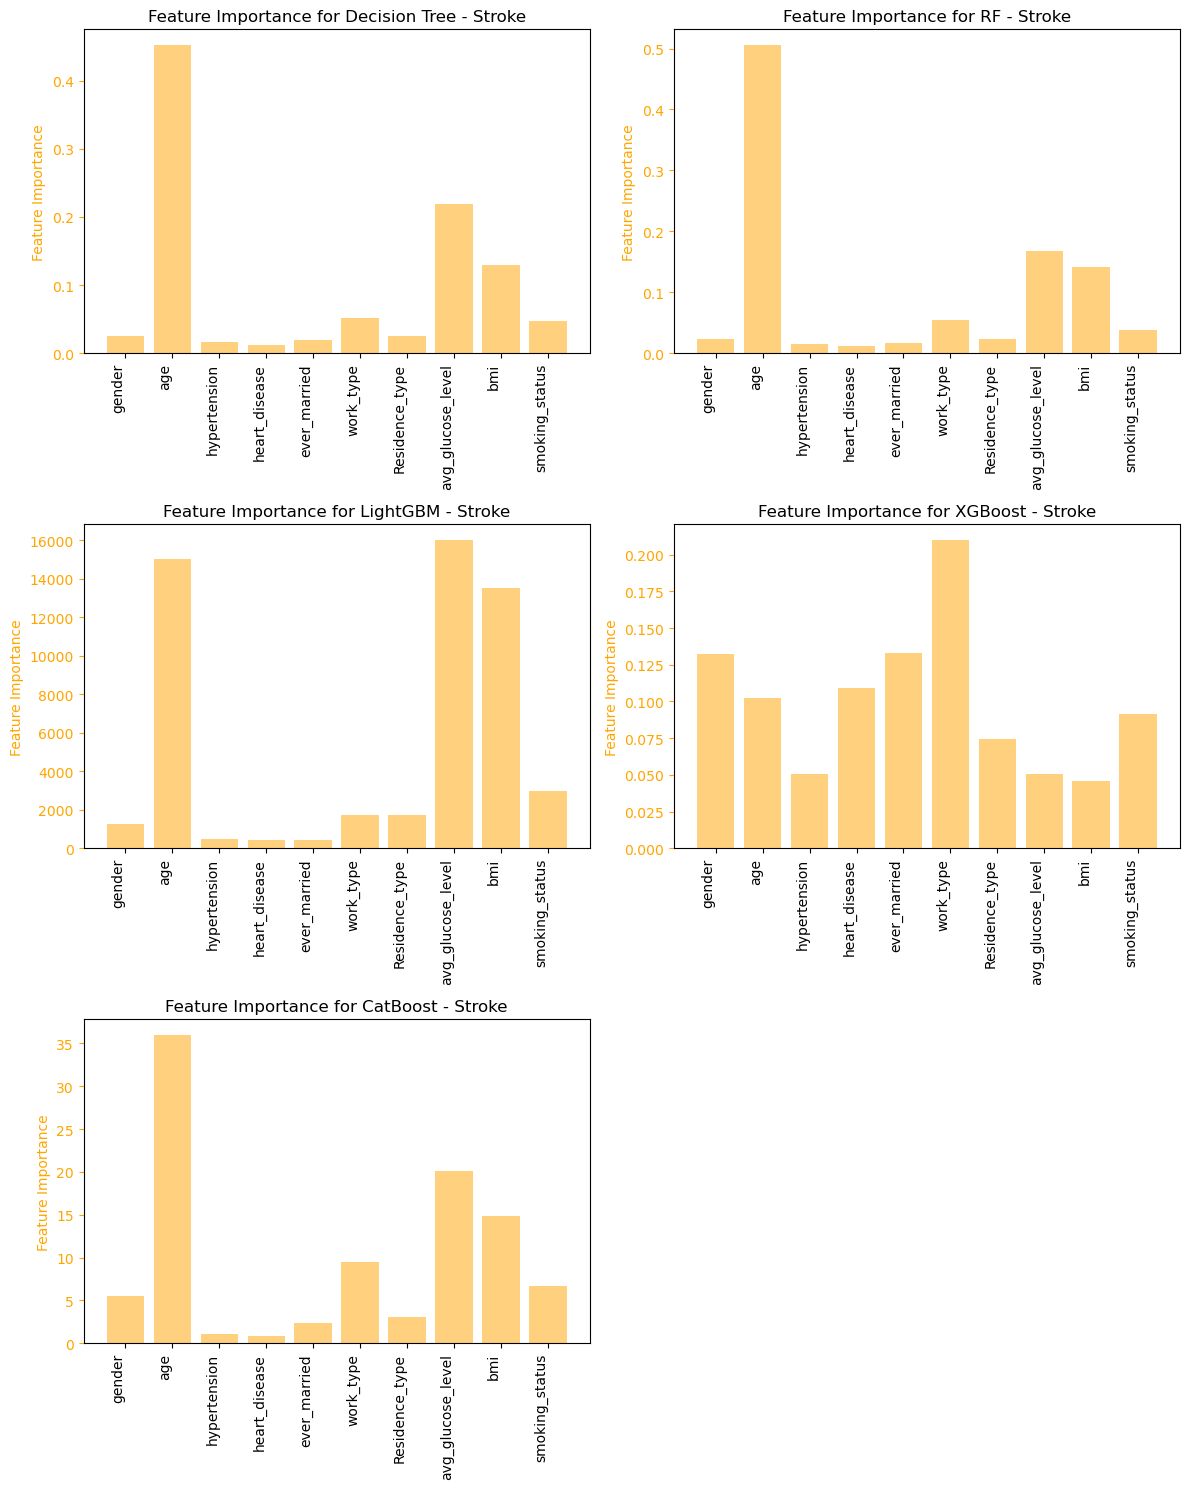

In [53]:
plot_feature_importance(predictions, 1, 'Stroke', df.drop('stroke', axis=1))

# Enhancement - Feature Scaling Effect

In [54]:
X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid = split_data(df, 'stroke', apply_standard_scaler=True)

(3066, 10)
(3066,)
(1022, 10)
(1022,)
(1022, 10)
(1022,)


## CNN

In [55]:
cnn, best_param_cnn, y_pred_cnn, cnn_accuracy, cnn_history = cnn_classifier_hp(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, epochs=100)

Reloading Tuner from dir\cnn_hyperparameter_tuning\tuner0.json
Epoch 1/100
96/96 [==============================] - 1s 4ms/step - loss: 0.2269 - accuracy: 0.9472 - val_loss: 0.1726 - val_accuracy: 0.9569
Epoch 2/100
96/96 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9534 - val_loss: 0.1646 - val_accuracy: 0.9569
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9534 - val_loss: 0.1691 - val_accuracy: 0.9569
Epoch 4/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1634 - accuracy: 0.9534 - val_loss: 0.1592 - val_accuracy: 0.9569
Epoch 5/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1635 - accuracy: 0.9534 - val_loss: 0.1609 - val_accuracy: 0.9569
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9534 - val_loss: 0.1600 - val_accuracy: 0.9569
Epoch 7/100
96/96 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy:

## MLP

In [56]:
mlp, y_pred_mlp, mlp_accuracy = mlp_classifier(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, params = best_param_mlp )

Train Accuracy:  0.9960861056751468
Test Accuracy:  0.910958904109589
Validation Accuracy:  0.910958904109589 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.18      0.13      0.15        62

    accuracy                           0.91      1022
   macro avg       0.56      0.55      0.55      1022
weighted avg       0.90      0.91      0.90      1022



## SVM

In [57]:
svm, y_pred_svm, svm_accuracy = svm_classifier(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, params = best_param_svm )

Train Accuracy:  0.9533594259621657
Test Accuracy:  0.9393346379647749
Validation Accuracy:  0.9569471624266145 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DT

In [58]:
dt, y_pred_dt, dt_accuracy = dt_classifier(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, params = best_param_dt )

Train Accuracy:  1.0
Test Accuracy:  0.9041095890410958
Validation Accuracy:  0.9187866927592955 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.17      0.15      0.16        62

    accuracy                           0.90      1022
   macro avg       0.56      0.55      0.55      1022
weighted avg       0.90      0.90      0.90      1022



## RF

In [59]:
rf, y_pred_rf, rf_accuracy = rf_classifier(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, params = best_param_rf )

Train Accuracy:  1.0
Test Accuracy:  0.9334637964774951
Validation Accuracy:  0.952054794520548 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.20      0.03      0.06        62

    accuracy                           0.93      1022
   macro avg       0.57      0.51      0.51      1022
weighted avg       0.90      0.93      0.91      1022



## LightGBM

In [60]:
lgbm, y_pred_lgbm, lgbm_accuracy = lgbm_classifier(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, params = best_param_lgbm )

Train Accuracy:  1.0
Test Accuracy:  0.9334637964774951
Validation Accuracy:  0.952054794520548 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.29      0.06      0.11        62

    accuracy                           0.93      1022
   macro avg       0.61      0.53      0.54      1022
weighted avg       0.90      0.93      0.91      1022



## XGBoost

In [61]:
xgb, y_pred_xgb, xgb_accuracy = xgboost_classifier(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, params = best_param_xgb )

Train Accuracy:  1.0
Test Accuracy:  0.9295499021526419
Validation Accuracy:  0.9461839530332681 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       960
           1       0.25      0.08      0.12        62

    accuracy                           0.93      1022
   macro avg       0.60      0.53      0.54      1022
weighted avg       0.90      0.93      0.91      1022



## CatBoost

In [62]:
cat, y_pred_cat, cat_accuracy = catboost_classifier(X_train_scaled, X_test_scaled, X_valid_scaled, y_train, y_test, y_valid, params = best_param_cat )

0:	learn: 0.2484226	total: 3.45ms	remaining: 1.03s
1:	learn: 0.1912813	total: 5.96ms	remaining: 888ms
2:	learn: 0.1658190	total: 10.4ms	remaining: 1.03s
3:	learn: 0.1522149	total: 15.2ms	remaining: 1.12s
4:	learn: 0.1433793	total: 18.7ms	remaining: 1.1s
5:	learn: 0.1378674	total: 22.6ms	remaining: 1.11s
6:	learn: 0.1326260	total: 26.9ms	remaining: 1.12s
7:	learn: 0.1286387	total: 30.5ms	remaining: 1.11s
8:	learn: 0.1230832	total: 34.3ms	remaining: 1.11s
9:	learn: 0.1191151	total: 38.1ms	remaining: 1.1s
10:	learn: 0.1140565	total: 42ms	remaining: 1.1s
11:	learn: 0.1106905	total: 46.3ms	remaining: 1.11s
12:	learn: 0.1095415	total: 50.3ms	remaining: 1.11s
13:	learn: 0.1059277	total: 54.5ms	remaining: 1.11s
14:	learn: 0.1058257	total: 56.7ms	remaining: 1.08s
15:	learn: 0.1032637	total: 60.4ms	remaining: 1.07s
16:	learn: 0.1012551	total: 64.1ms	remaining: 1.07s
17:	learn: 0.0983897	total: 68.3ms	remaining: 1.07s
18:	learn: 0.0969583	total: 72.2ms	remaining: 1.07s
19:	learn: 0.0934068	total:

## Store details to dictionaries

In [63]:
# Store results to dictionaries Stroke after Applied Standard Scaler
predictions[1]['Stroke After Standard Scaler'].append(('CNN', cnn, y_pred_cnn, y_test, cnn_accuracy, best_param_cnn, cnn_hist))
predictions[1]['Stroke After Standard Scaler'].append(('MLP', mlp, y_pred_mlp, y_test, mlp_accuracy, best_param_mlp))
predictions[1]['Stroke After Standard Scaler'].append(('SVM', svm, y_pred_svm, y_test, svm_accuracy, best_param_svm))
predictions[1]['Stroke After Standard Scaler'].append(('Decision Tree', dt, y_pred_dt, y_test, dt_accuracy, best_param_dt))
predictions[1]['Stroke After Standard Scaler'].append(('RF', rf, y_pred_rf, y_test, rf_accuracy, best_param_rf))
predictions[1]['Stroke After Standard Scaler'].append(('LightGBM', lgbm, y_pred_lgbm, y_test, lgbm_accuracy, best_param_lgbm))
predictions[1]['Stroke After Standard Scaler'].append(('XGBoost', xgb, y_pred_xgb, y_test, xgb_accuracy, best_param_xgb))
predictions[1]['Stroke After Standard Scaler'].append(('CatBoost', cat, y_pred_cat, y_test, cat_accuracy, best_param_cat))

display_metrics(metrics)

Model           Best Parameter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

## Performance Metrics

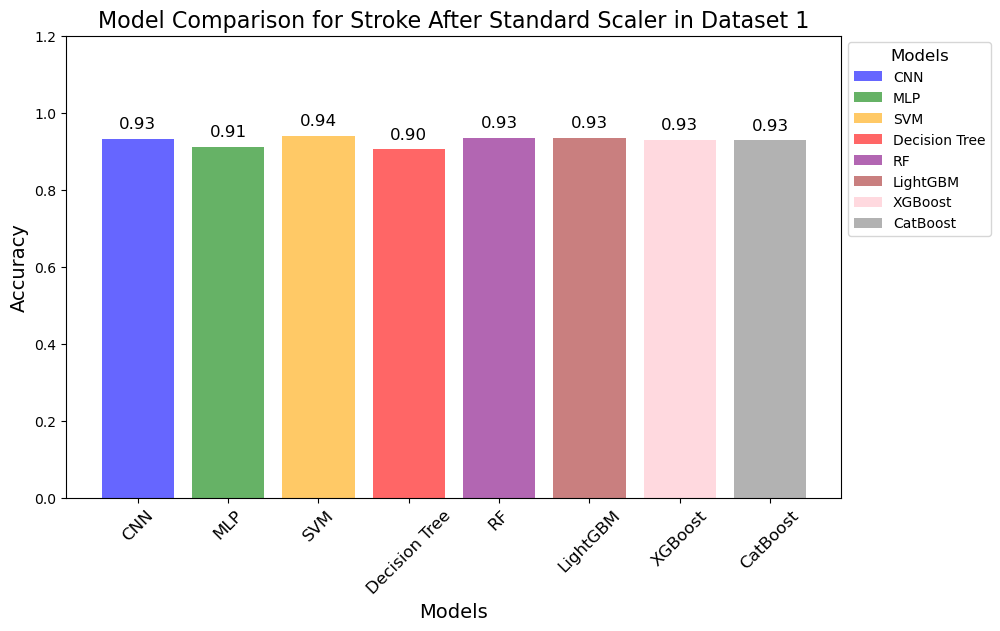

In [64]:
# Compare accuracies
plot_comparison(predictions, 1, 'Stroke After Standard Scaler')

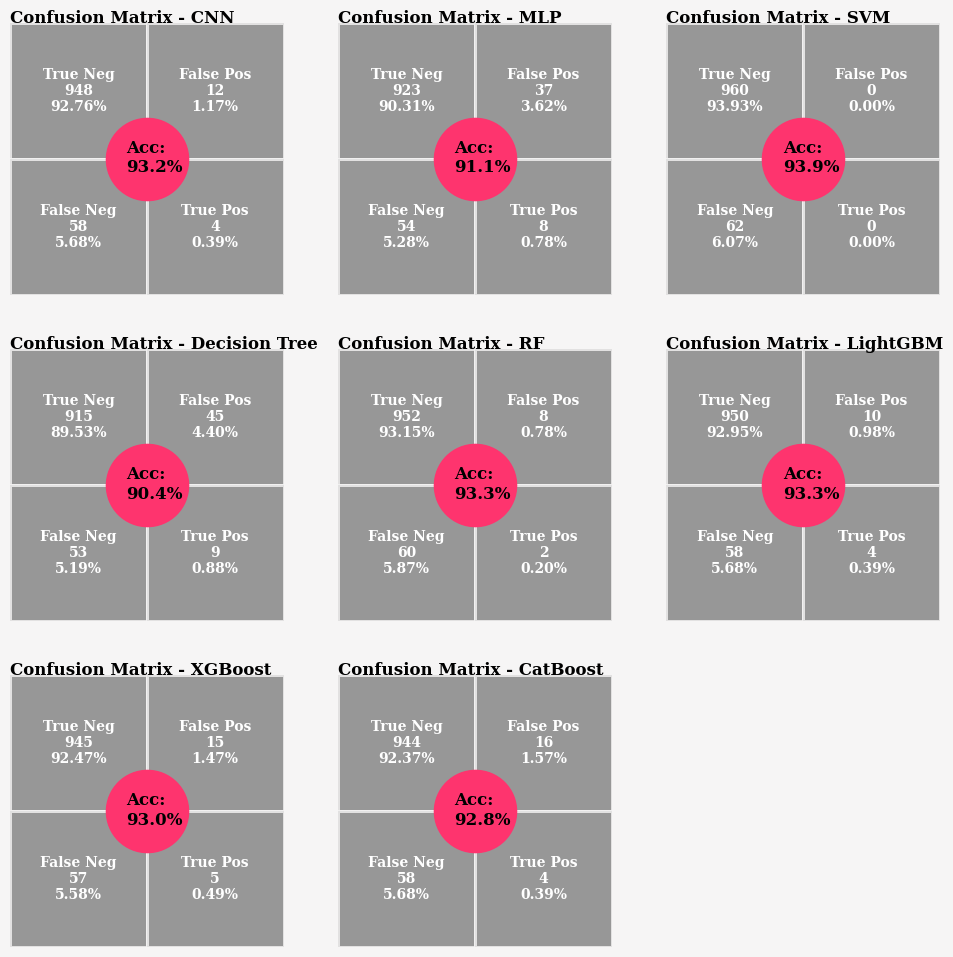

In [65]:
# Compare confusion Matrix
plot_confusion_matrices(predictions, 1, 'Stroke After Standard Scaler')

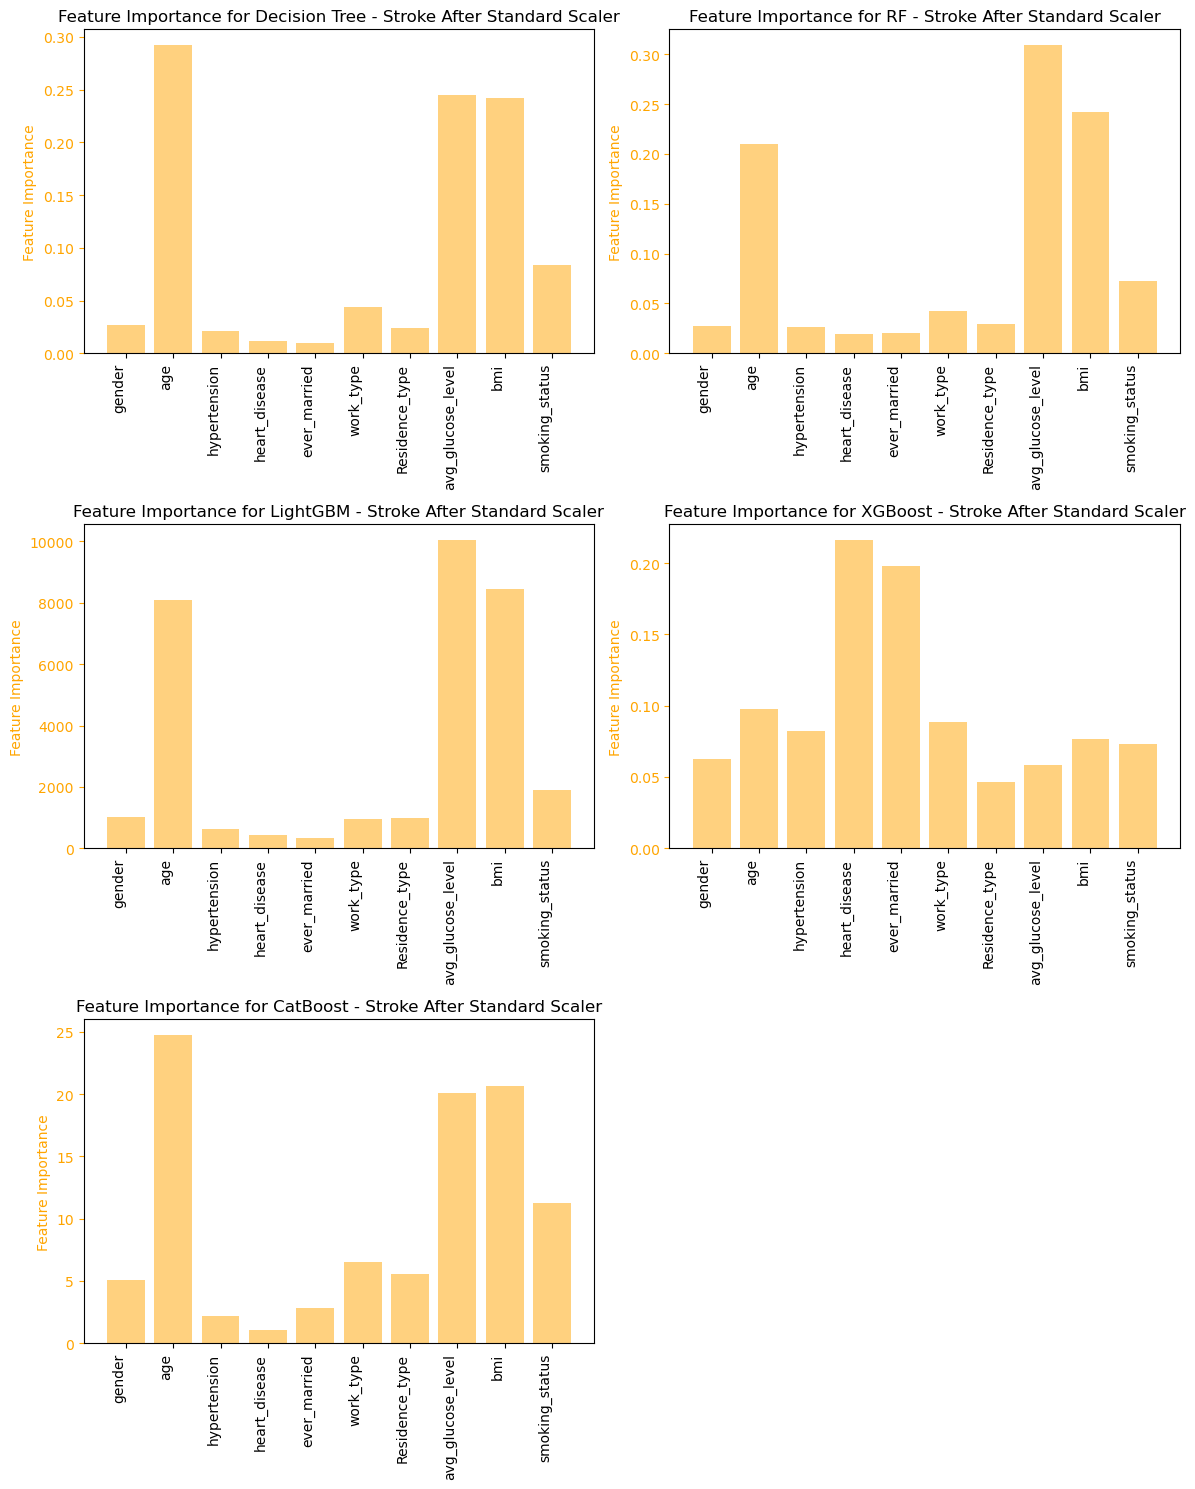

In [66]:
plot_feature_importance(predictions, 1, 'Stroke After Standard Scaler', df.drop('stroke', axis=1))